## Import The Libraries

In [1]:
# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import  ExtraTreesClassifier
from sklearn.linear_model import  SGDClassifier
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load The Dataset...

In [2]:
telecom = pd.read_csv('Telecom Customers Churn.csv')

In [3]:
telecom.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
telecom.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [7]:
telecom.shape

(7043, 21)

In [8]:
telecom =  telecom.drop('customerID',axis=1)

In [9]:
telecom.tail(3)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
7040    No  
7041   Yes  
7042    No

## EDA

In [10]:
categorical_columns=telecom.select_dtypes(include='object').columns
categorical_columns=categorical_columns.drop('TotalCharges')
categorical_columns.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

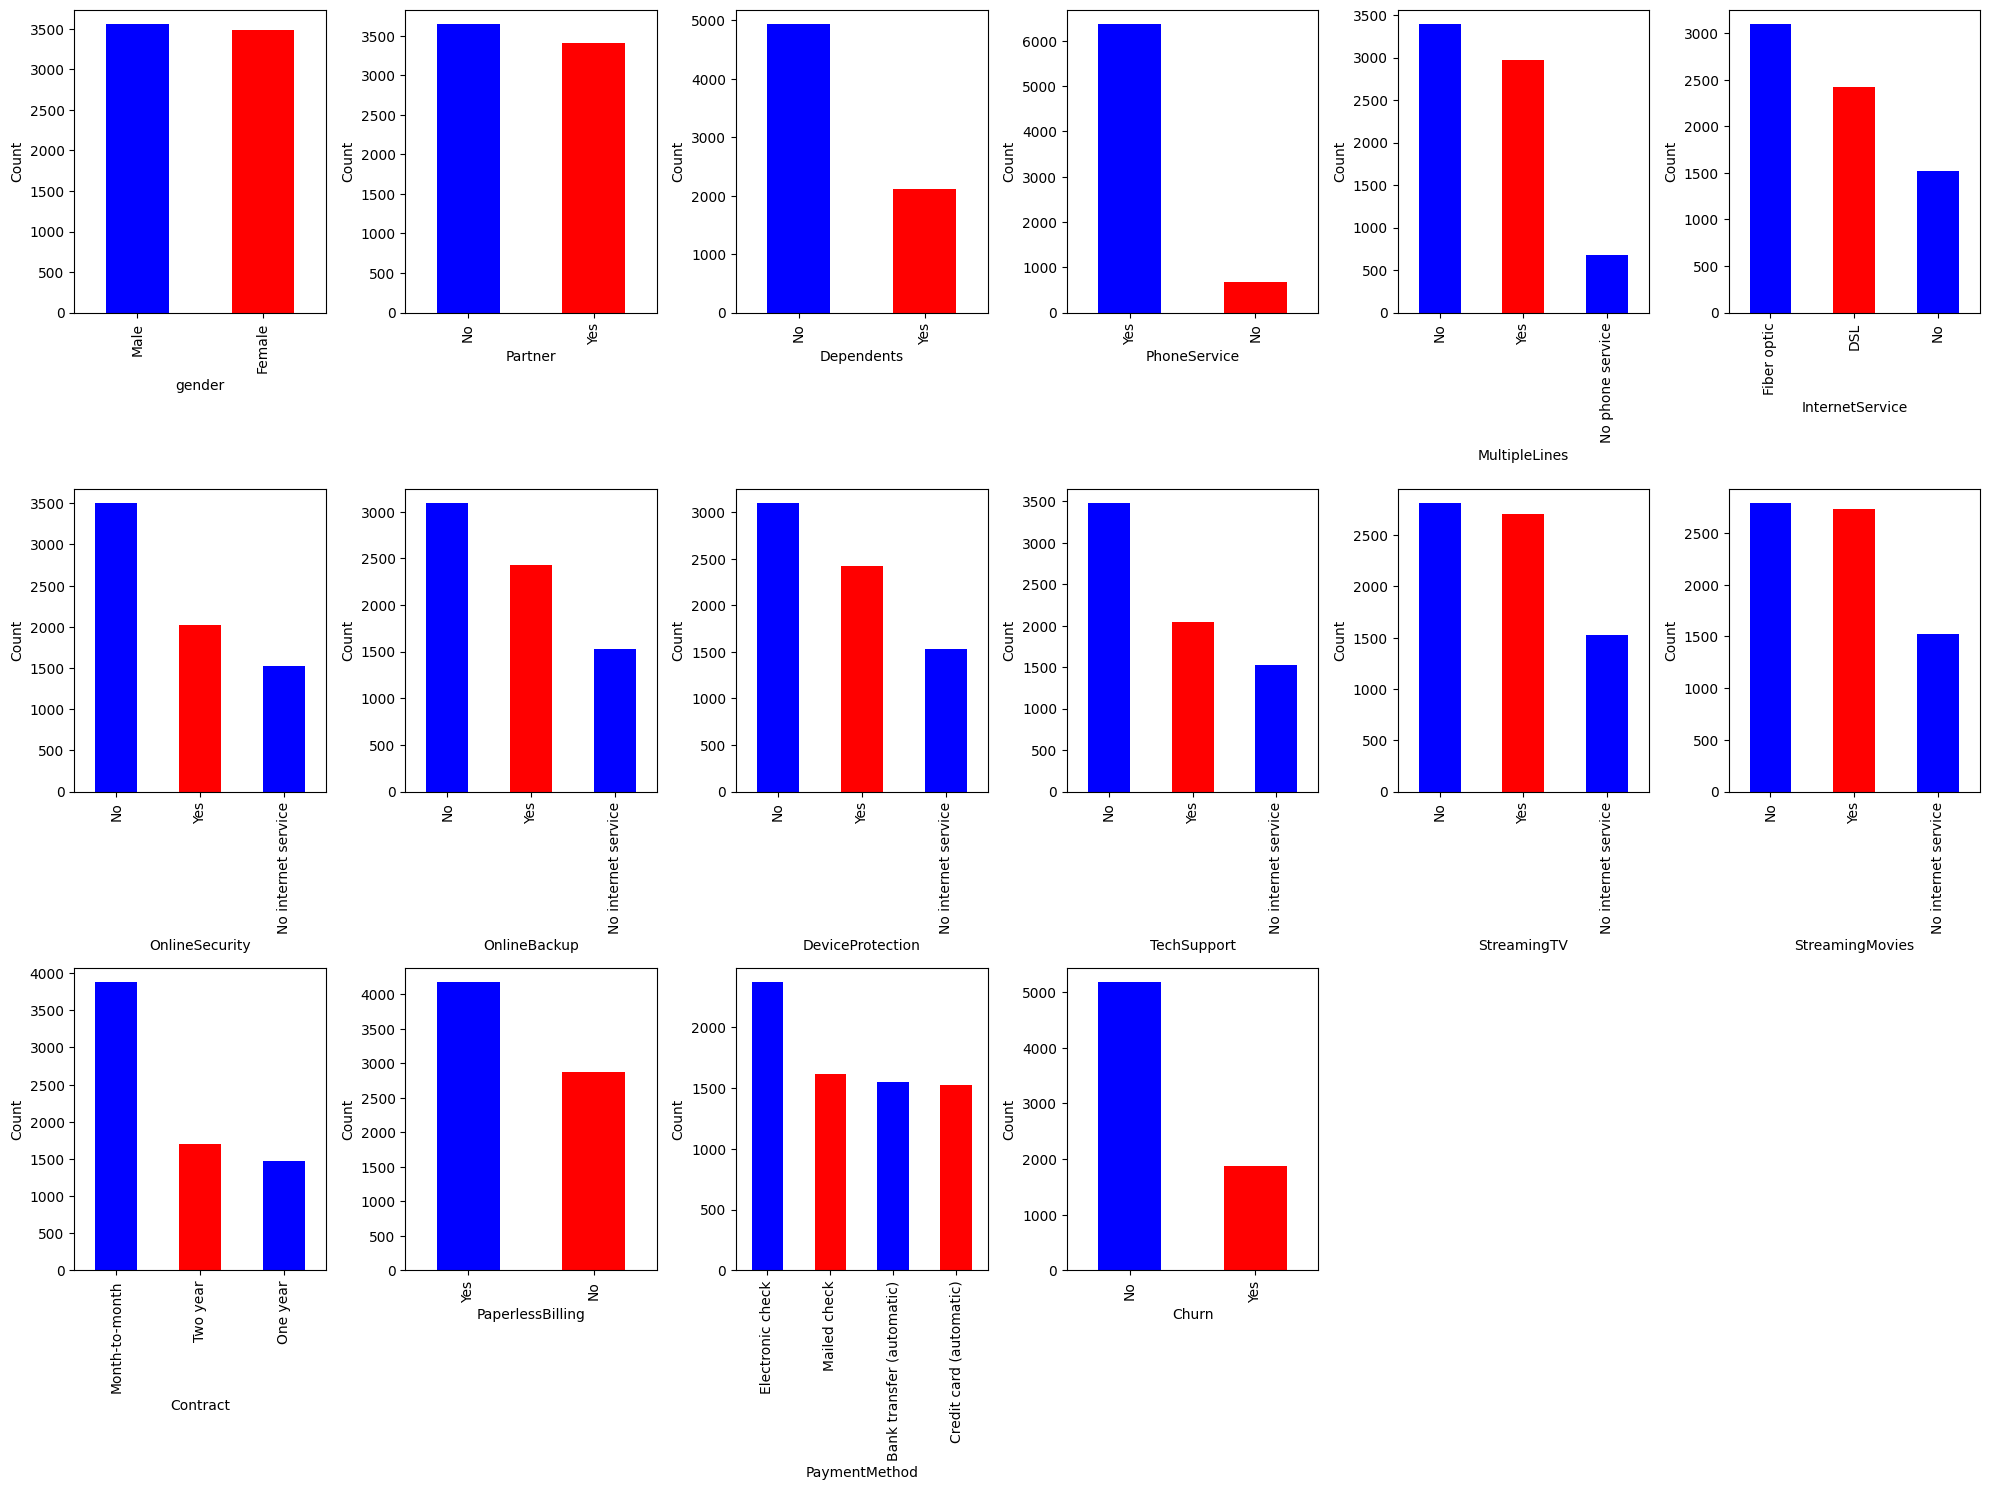

In [11]:
plt.figure(figsize=(20,15))
for i in range(len(categorical_columns)):
  plt.subplot(3,6,i+1)
  telecom[categorical_columns[i]].value_counts().plot(kind='bar',color=['blue','red'])
  plt.xlabel(f'{categorical_columns[i]}')
  plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [12]:
def stacked_bar_chart(feature,target):
    crosstab = pd.crosstab(telecom[feature], telecom[target])
    #Stacked bar plot
    ax=crosstab.plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Chart of {feature} vs {target}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%.0f')
    plt.tight_layout()
    plt.show()

In [13]:
def plot_density(feature):
  fig, ax = plt.subplots(figsize=(10,6))
  sns.kdeplot(telecom[feature], shade=True)
  plt.title(f'The Density of {feature}')
  plt.show()

In [14]:
def RelKPlot(feature,Selectedfeature,FirstValue,SecondValue) :
    fig, ax = plt.subplots(figsize=(30,8))

    plt.subplot(1,3,1)
    plt.title('Total')
    Data = telecom
    sns.kdeplot(Data[feature], shade=True)

    plt.subplot(1,3,2)
    plt.title('Churn')
    Data = telecom[telecom[Selectedfeature]==FirstValue]
    sns.kdeplot(Data[feature], shade=True)

    plt.subplot(1,3,3)
    plt.title('Not Churn')
    Data = telecom[telecom[Selectedfeature]==SecondValue]
    sns.kdeplot(Data[feature], shade=True)

    plt.show()

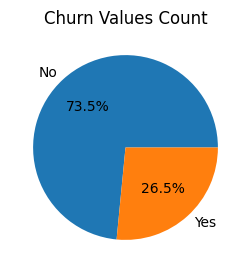

In [15]:
churn_values = telecom['Churn'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(churn_values,labels=churn_values.index,autopct='%1.1f%%')
plt.title('Churn Values Count')
plt.show()

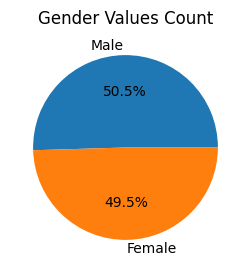

In [16]:
gender_values = telecom['gender'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(gender_values,labels=gender_values.index,autopct='%1.1f%%')
plt.title('Gender Values Count')
plt.show()

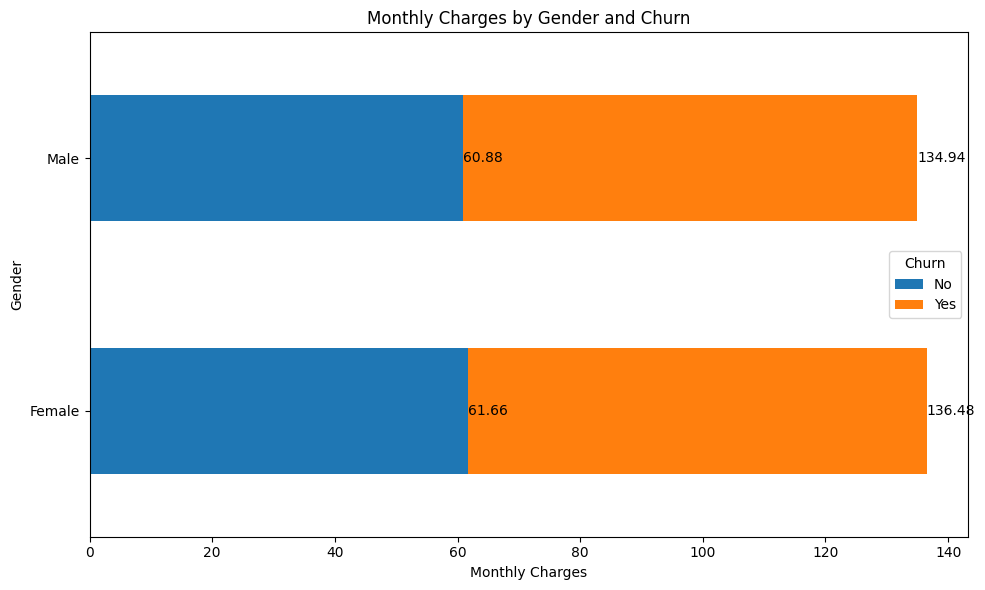

In [17]:
grouby_gender_churn=telecom.groupby(['gender','Churn'])['MonthlyCharges'].mean().unstack().fillna(0)
ax = grouby_gender_churn.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Gender')
ax.set_title('Monthly Charges by Gender and Churn')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.tight_layout()
plt.show()

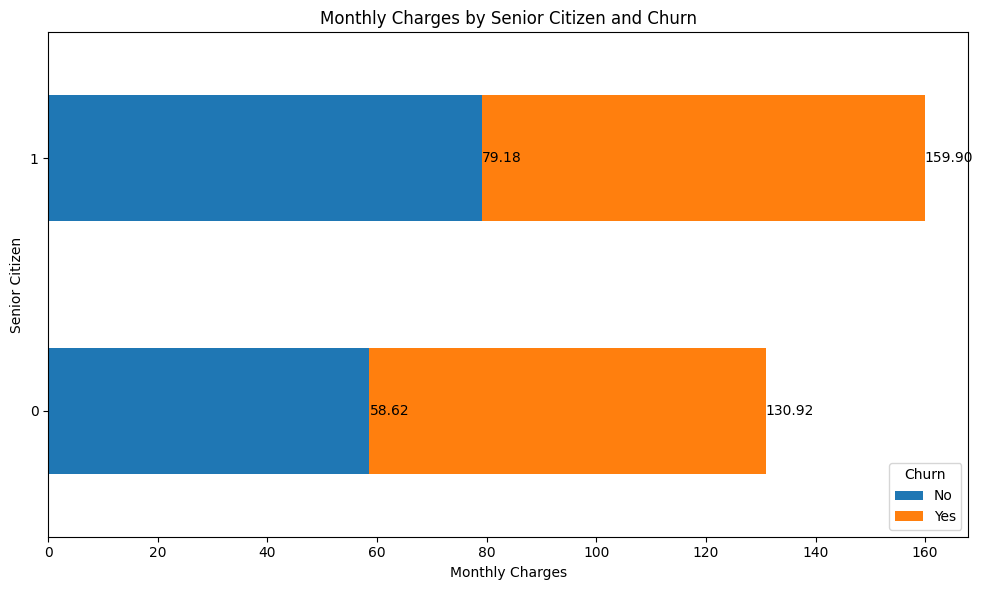

In [18]:
groupby_senior_churn=telecom.groupby(['SeniorCitizen','Churn'])['MonthlyCharges'].mean().unstack().fillna(0)
ax = groupby_senior_churn.plot(kind='barh', stacked=True, figsize=(10, 6))
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Senior Citizen')
ax.set_title('Monthly Charges by Senior Citizen and Churn')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.tight_layout()
plt.show()

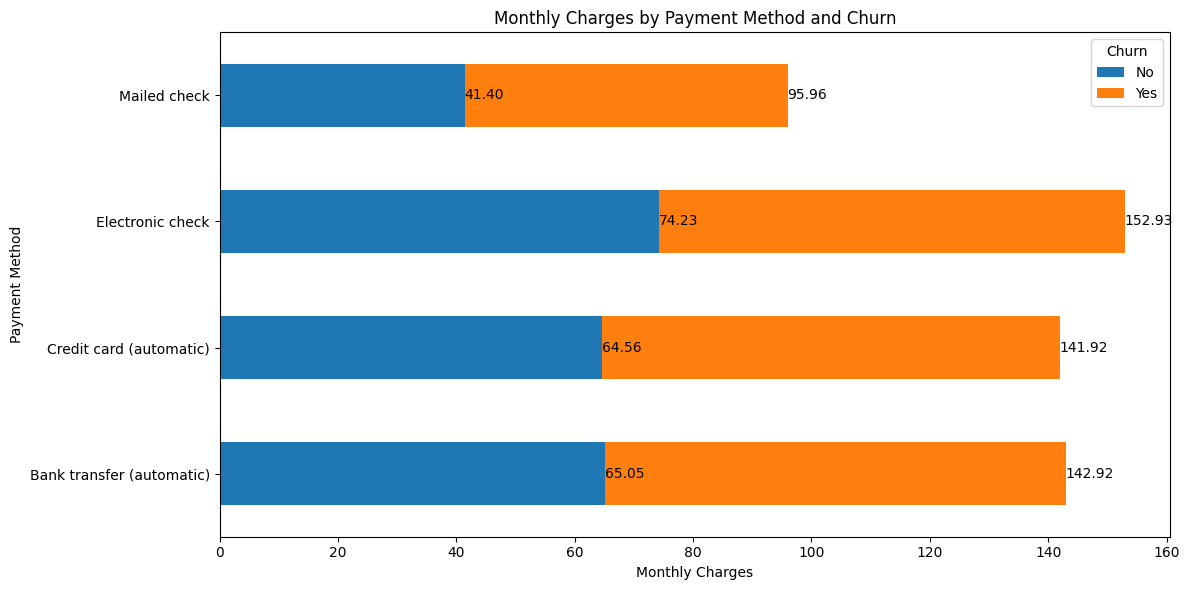

In [19]:
groupby_payment_churn=telecom.groupby(['PaymentMethod','Churn'])['MonthlyCharges'].mean().unstack().fillna(0)
ax = groupby_payment_churn.plot(kind='barh', stacked=True, figsize=(12, 6))
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Payment Method')
ax.set_title('Monthly Charges by Payment Method and Churn')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.tight_layout()
plt.show()

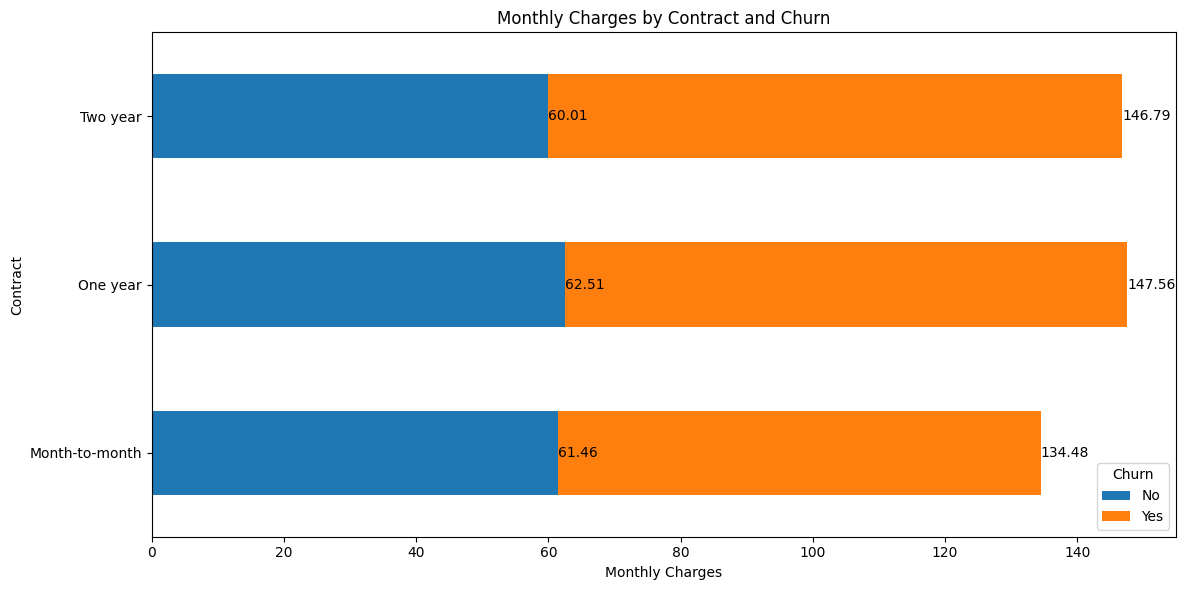

In [20]:
groupby_payment_churn=telecom.groupby(['Contract','Churn'])['MonthlyCharges'].mean().unstack().fillna(0)
ax = groupby_payment_churn.plot(kind='barh', stacked=True, figsize=(12, 6))
ax.set_xlabel('Monthly Charges')
ax.set_ylabel('Contract')
ax.set_title('Monthly Charges by Contract and Churn')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f')
plt.tight_layout()
plt.show()

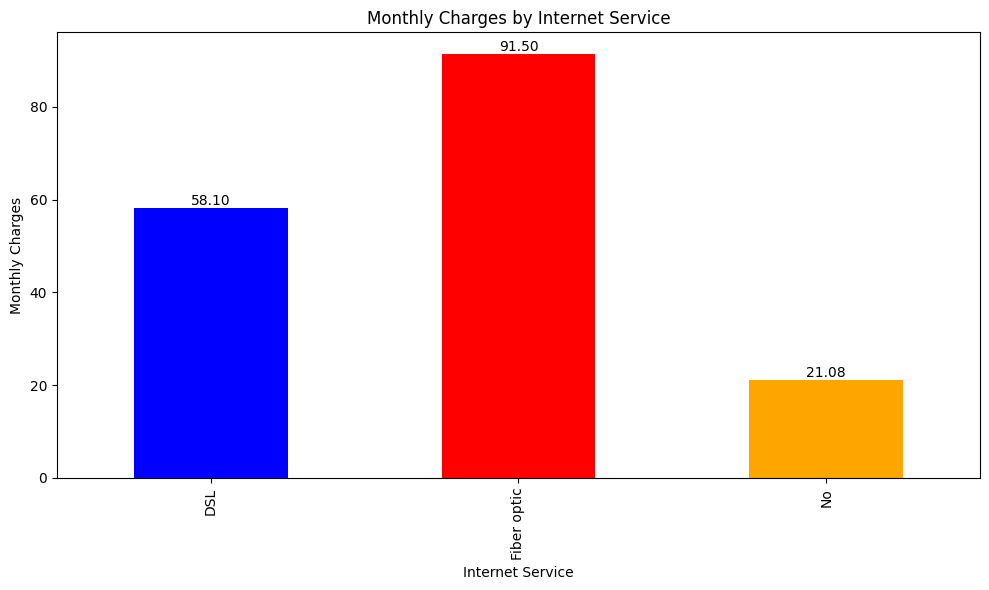

In [21]:
groupby_InternetService=telecom.groupby(['InternetService'])['MonthlyCharges'].mean()
groupby_InternetService.plot(kind='bar',figsize=(10,6),color=['blue','red','orange'])
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Internet Service')
for i in range(len(groupby_InternetService)):
    plt.text(i, groupby_InternetService[i], f'{groupby_InternetService[i]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

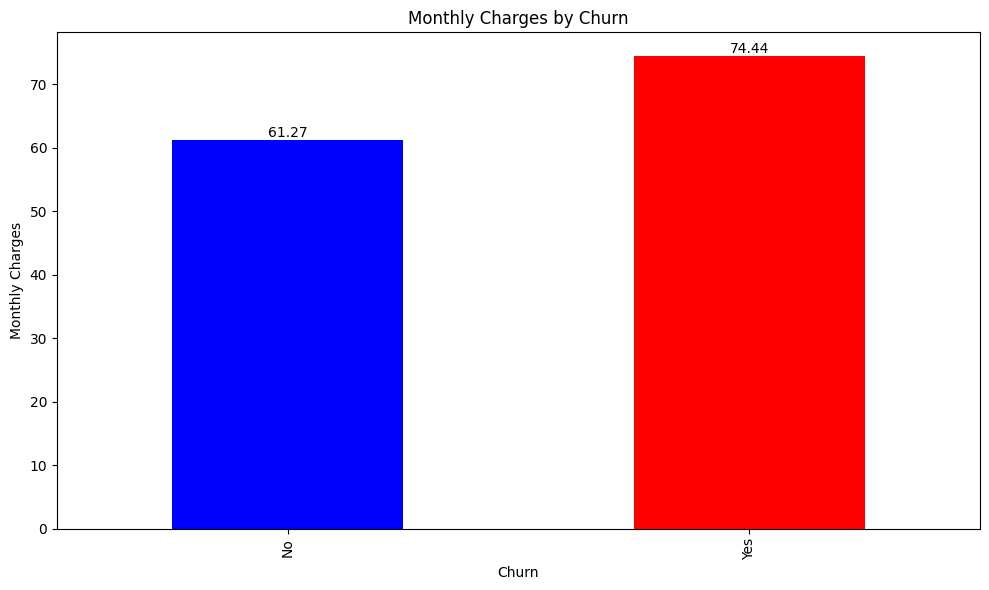

In [22]:
groupby_Churn=telecom.groupby(['Churn'])['MonthlyCharges'].mean()
groupby_Churn.plot(kind='bar',figsize=(10,6),color=['blue','red'])
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Churn')
for i in range(len(groupby_Churn)):
    plt.text(i, groupby_Churn[i], f'{groupby_Churn[i]:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

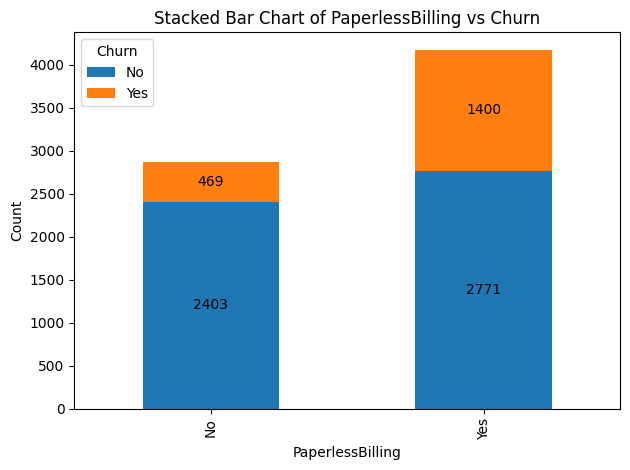

In [23]:
stacked_bar_chart('PaperlessBilling','Churn')

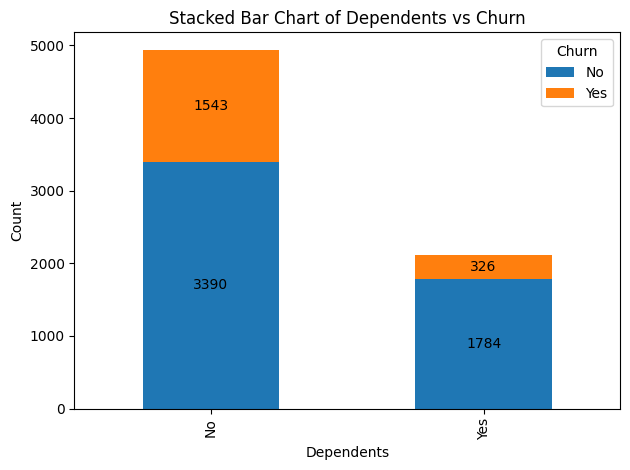

In [24]:
stacked_bar_chart('Dependents','Churn')

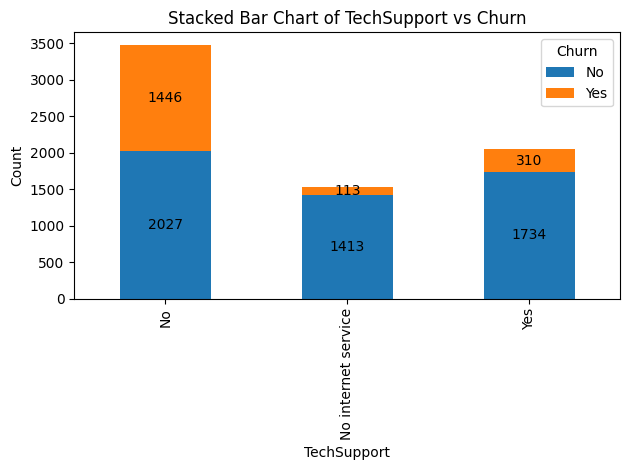

In [25]:
stacked_bar_chart('TechSupport','Churn')

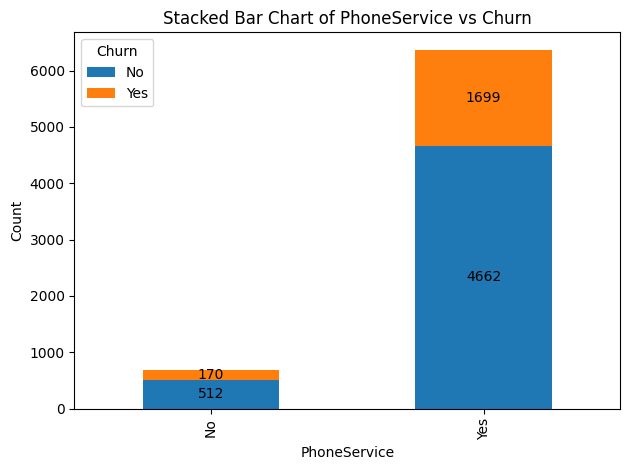

In [26]:
stacked_bar_chart('PhoneService','Churn')

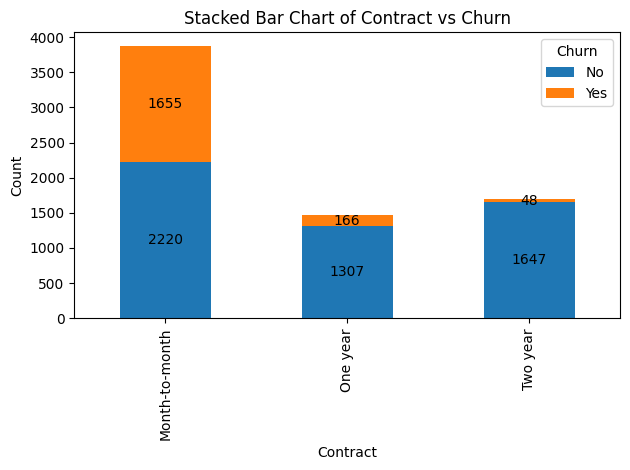

In [27]:
stacked_bar_chart('Contract','Churn')

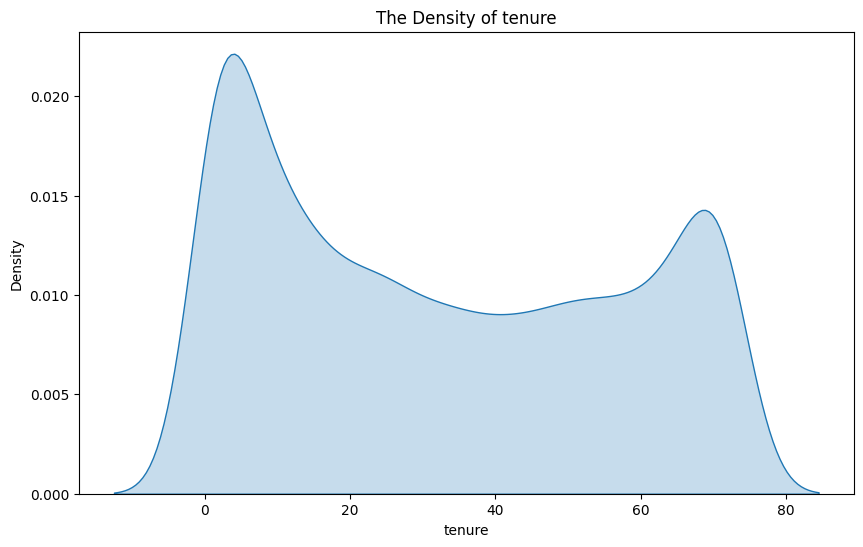

In [28]:
plot_density('tenure')

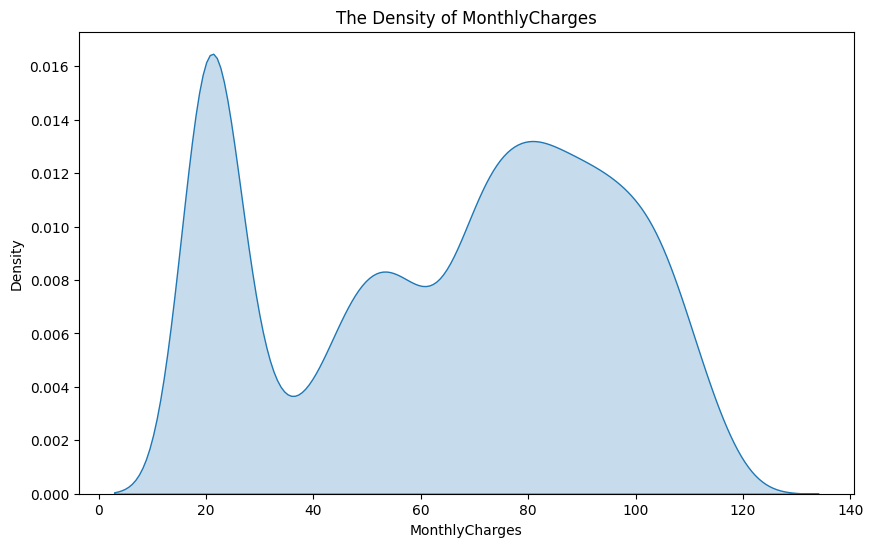

In [29]:
plot_density('MonthlyCharges')

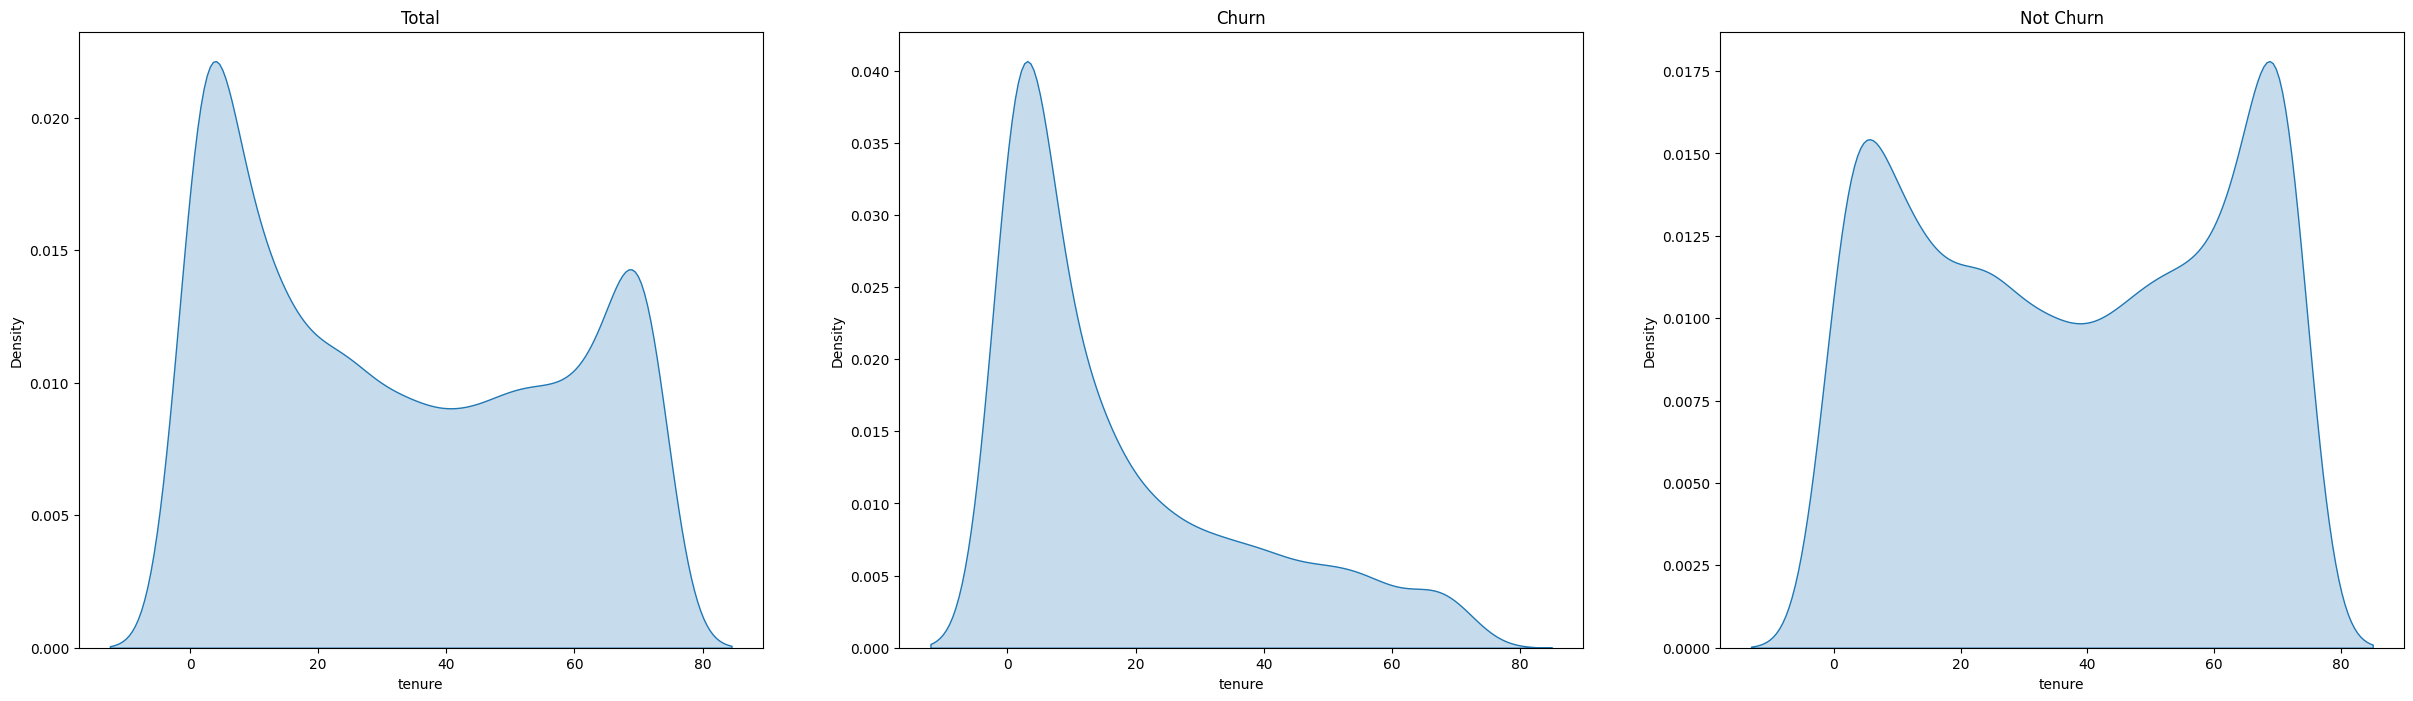

In [30]:
RelKPlot('tenure','Churn','Yes','No')

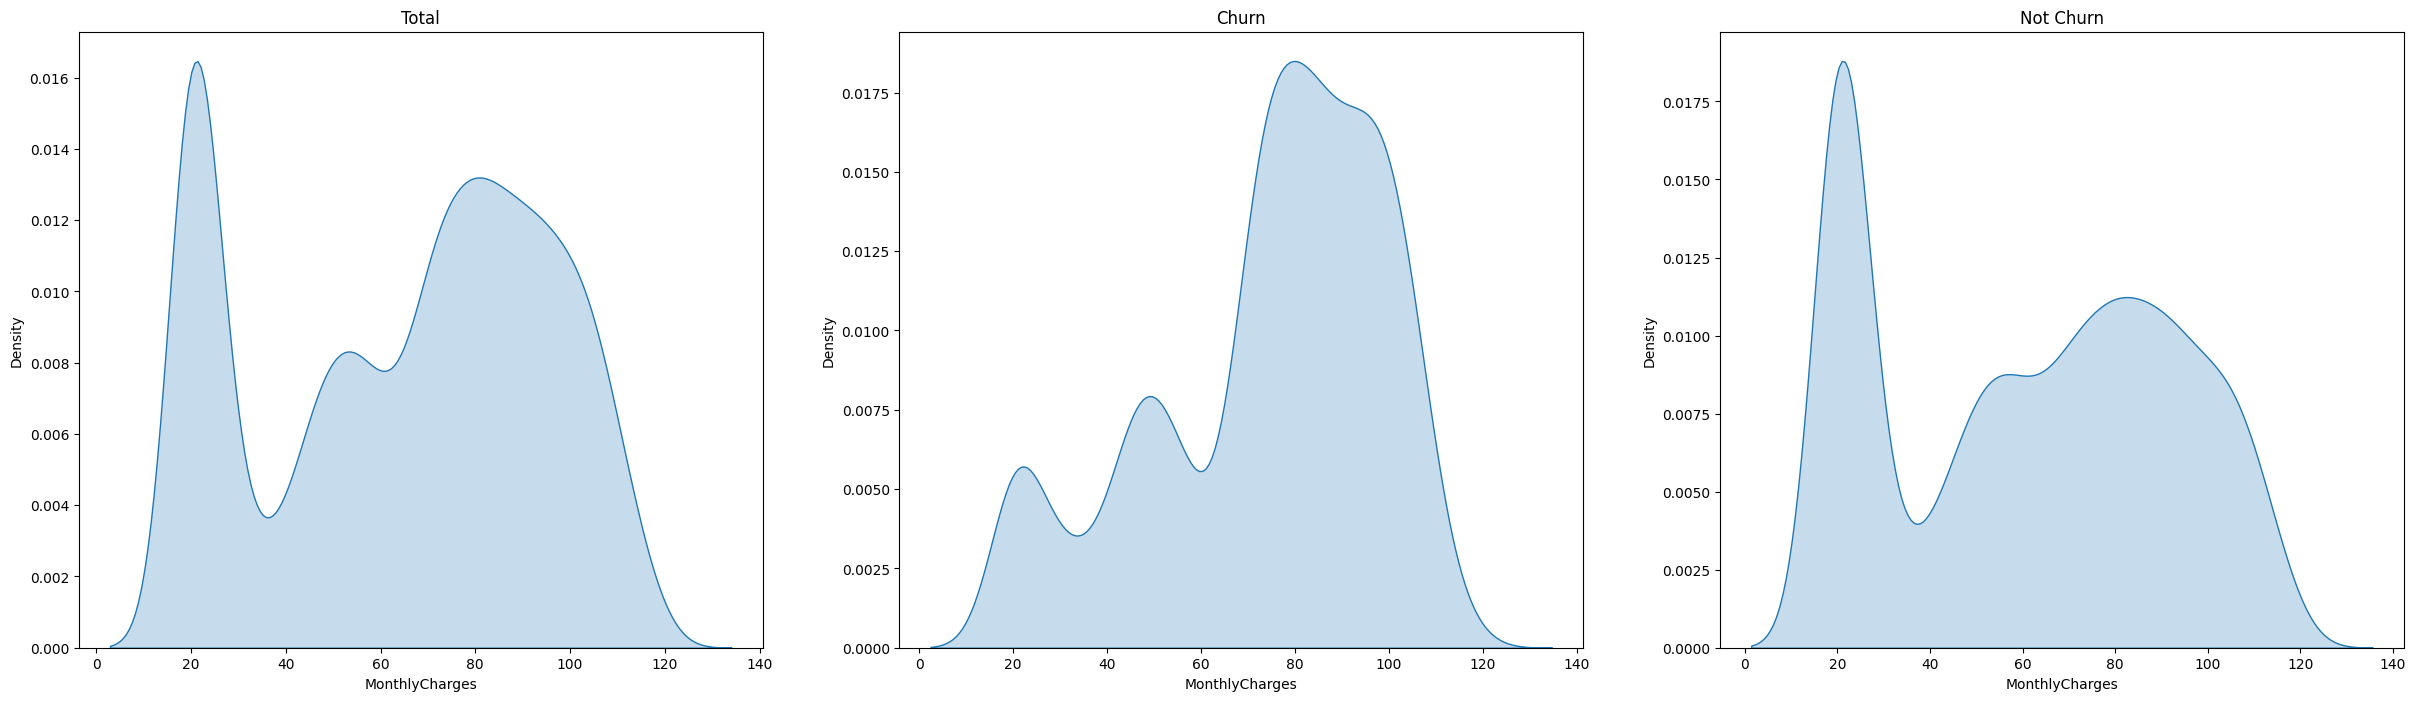

In [31]:
RelKPlot('MonthlyCharges','Churn','Yes','No')

In [32]:
## Dectect The Outliers:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# List of variables to plot
contiguous_regions = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create subplots: 1 row and 3 columns
fig = make_subplots(rows=1, cols=3, subplot_titles=contiguous_regions)

# Add boxplots to the subplots
for i, region in enumerate(contiguous_regions):
    fig.add_trace(go.Box(y=telecom[region], name=f'{region}', boxmean=True),
                  row=1, col=i+1)  # Each boxplot goes in its own column

# Update layout
fig.update_layout(
    title="Boxplots of Tenure, Monthly Charges, and Total Charges",
    height=600,  # Height of the plot
    width=1000,  # Width of the plot
    showlegend=False  # Hide legends
)

# Show the plot
fig.show()

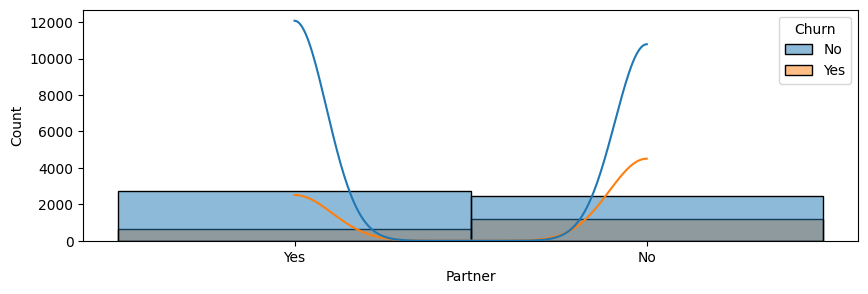

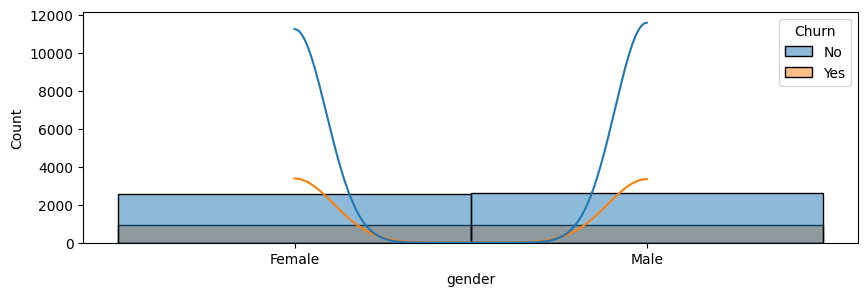

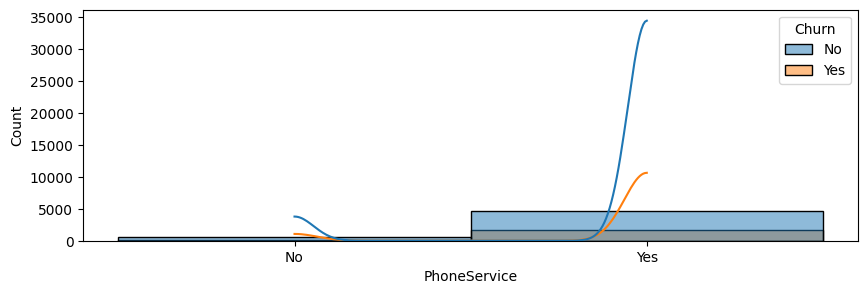

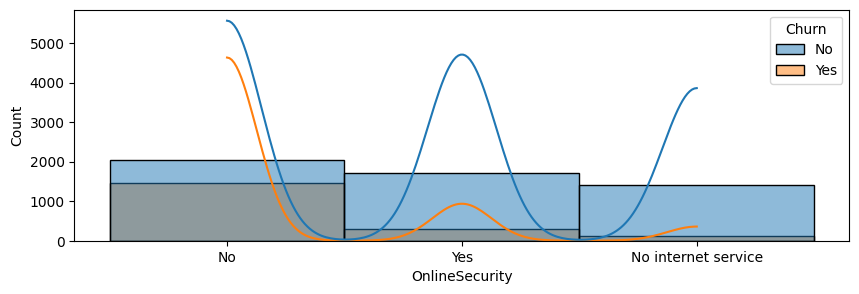

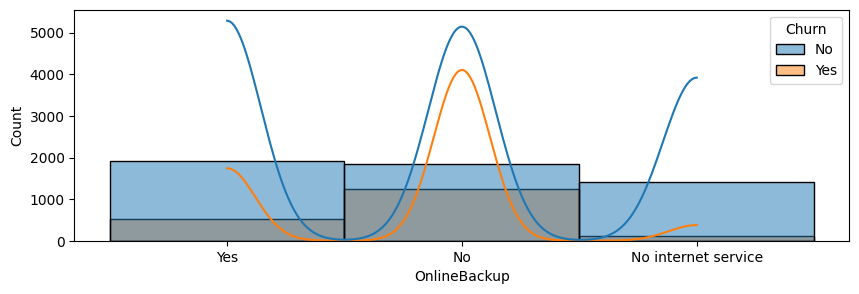

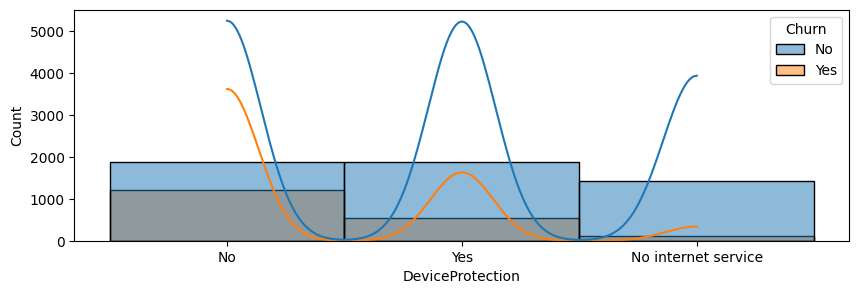

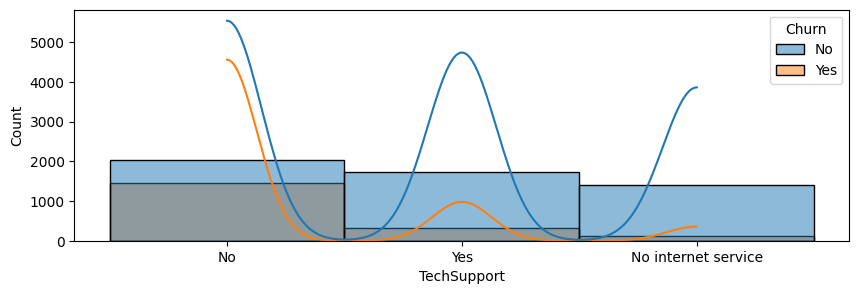

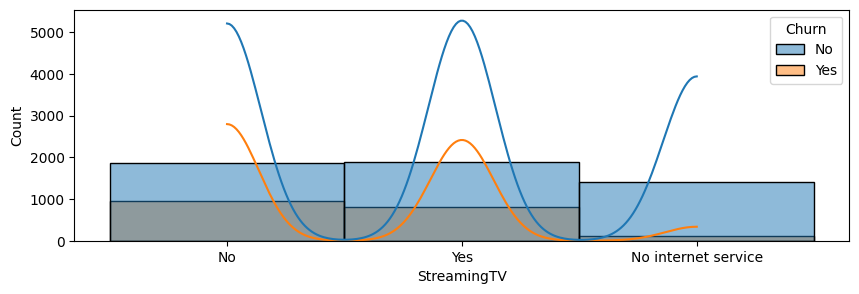

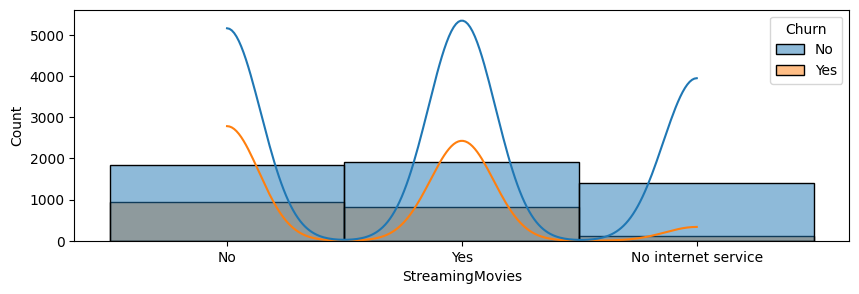

In [33]:
features = ['Partner',
            'gender',
            'PhoneService',
            'OnlineSecurity',
            'OnlineBackup',
            'DeviceProtection',
            'TechSupport',
            'StreamingTV',
            'StreamingMovies']
for col in features :
    plt.figure(figsize=(10,3))
    sns.histplot(data=telecom,x=col,hue='Churn',kde=True)
    plt.show()

## Feature Engineering

In [34]:
l1 = [len(i.split()) for i in telecom['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

for i in l2:
    telecom.loc[i,'TotalCharges'] = telecom.loc[(i-1),'TotalCharges']

telecom['TotalCharges'] = telecom['TotalCharges'].astype(float)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

ds = telecom.copy(deep = True)
text_data_features = [i for i in list(telecom.columns) if i not in list(telecom.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    ds[i] = le.fit_transform(ds[i])
    print(i,' : ',ds[i].unique(),' = ',le.inverse_transform(ds[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [36]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

ds['tenure'] = mms.fit_transform(ds[['tenure']])
ds['MonthlyCharges'] = mms.fit_transform(ds[['MonthlyCharges']])
ds['TotalCharges'] = mms.fit_transform(ds[['TotalCharges']])
ds.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2        0.115423      0.001275      0  
1                 0              3        0.385075      0.215867      0  
2                 1              3        0.354229      0.010310      1  
3                 0              0        0.239303      0.210241      0  
4                 1              2        0.521891      0.015330      1

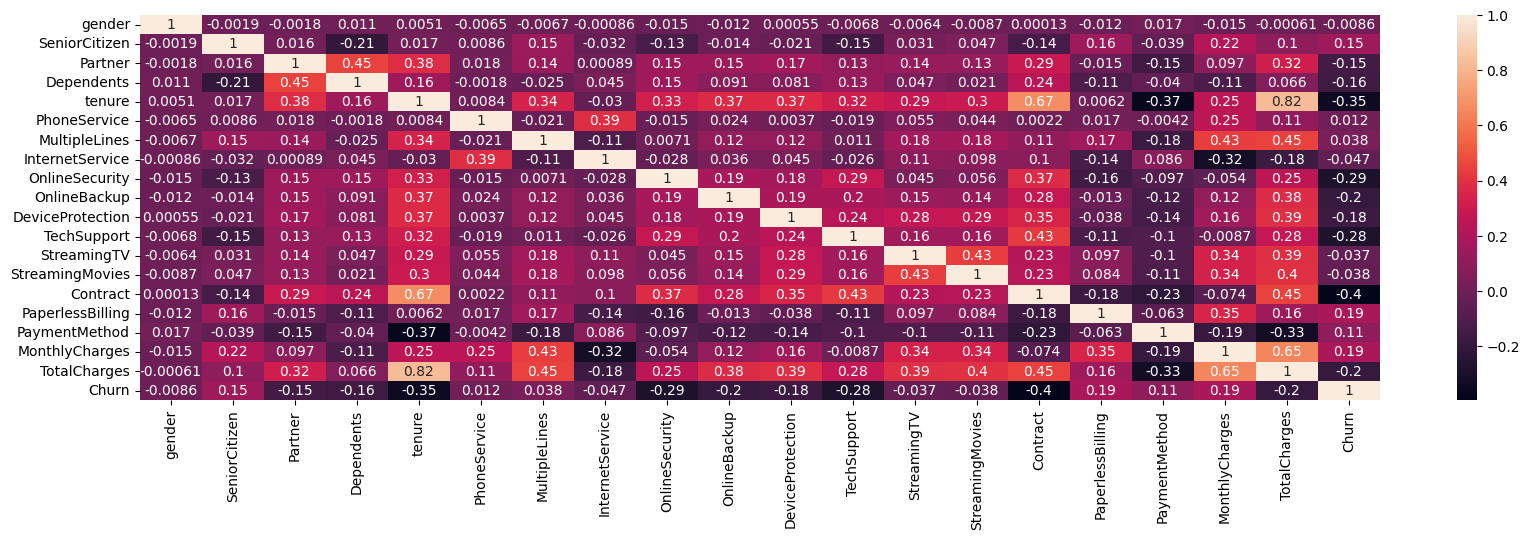

In [37]:
plt.figure(figsize = (20,5))
sns.heatmap(ds.corr(),annot = True);

In [38]:
col = list(ds.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(telecom[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


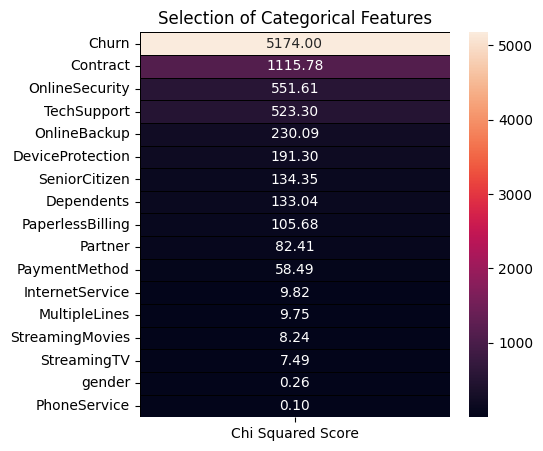

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

features = ds.loc[:,categorical_features]
target = ds.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

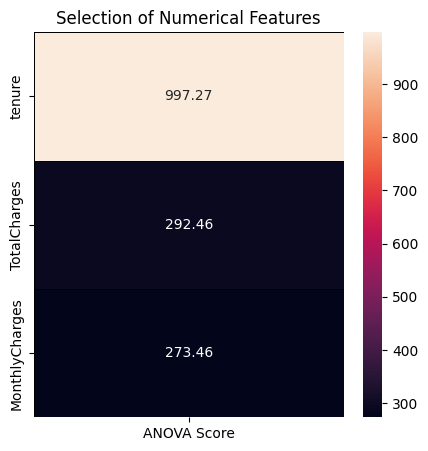

In [40]:
from sklearn.feature_selection import f_classif
features = ds.loc[:,numerical_features]
target = ds.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [41]:
ds.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines'],inplace = True)
ds.head()

SeniorCitizen  Partner  Dependents    tenure  InternetService  \
0              0        1           0  0.013889                0   
1              0        0           0  0.472222                0   
2              0        0           0  0.027778                0   
3              0        0           0  0.625000                0   
4              0        0           0  0.027778                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   
3               2             0                 2            2         1   
4               0             0                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2        0.115423      0.001275      0  
1                 0              3        0.385075      0.215867      0  
2                 1              3        0.354229      0.010310      1  
3                 0              0        0.239303      0.210241      0  
4                 1              2        0.521891      0.015330      1

# Features Extraction

***1) Monthly Charge With Tenure Feature***

creates a new feature in the dataset that multiplies the monthly charges (MonthlyCharges) by the number of months the customer has been with the company (tenure).

By multiplying these two columns, the new feature MonthlyChargeWithTenure provides an estimate of the total amount the customer has been charged over the period of their tenure. This value may help to identify long-term customers who have been paying higher amounts, which could influence their likelihood of churning or staying with the company.

In [42]:
ds['MonthlyChargeWithTenure']=ds['MonthlyCharges']*ds['tenure']

***2) Contract Length Feature***

Convert the Contract type into a numerical value to represent the length of the contract. Longer contracts might correlate with lower churn.

In [43]:
def ContractLength(df):
  if df['Contract']==0:
    return 1
  elif df['Contract']==1:
    return 12
  else:
    return 24

ds['ContractLength']=ds.apply(ContractLength,axis=1)

***3) Contract Tenure Risk Feature***

Create a new feature that reflects whether a customer is more likely to churn based on their contract type and tenure.

Month-to-month with low tenure could indicate high churn risk, while a two-year contract with long tenure might indicate low risk.

In [44]:
def calculate_contract_tenure_risk(df):
    contract = df['Contract']
    tenure = df['tenure']

    if contract == 0:
        if tenure <= 6:
            return 'High'
        elif 7 <= tenure <= 12:
            return 'Medium'
        else:
            return 'Low'
    elif contract == 1:
        if tenure <= 6:
            return 'Medium'
        elif 7 <= tenure <= 12:
            return 'Low'
        else:
            return 'Very Low'
    elif contract == 2:
        if tenure <= 12:
            return 'Low'
        else:
            return 'Very Low'

ds['ContractTenureRisk'] = ds.apply(calculate_contract_tenure_risk, axis=1)

In [45]:
ds['ContractTenureRisk']=ds['ContractTenureRisk'].replace({'Very Low':0,'Low':1,'Medium':2,'High':3})

In [46]:
from imblearn.combine import SMOTEENN
# UpSampling
X = ds.drop('Churn',axis=1)
y = ds['Churn']

sm = SMOTEENN()
X_res, y_res = sm.fit_resample(X, y)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_res, y_res, test_size=0.2)

In [47]:
y_res.value_counts()

Churn
1    3092
0    2961
Name: count, dtype: int64

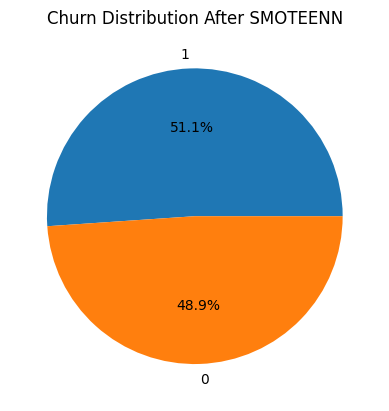

In [48]:
plt.pie(y_res.value_counts(),labels=y_res.value_counts().index,autopct='%1.1f%%')
plt.title('Churn Distribution After SMOTEENN')
plt.show()

## Modeling

In [ ]:
def model(classifier,Xr_train,yr_train,Xr_test,yr_test):

    classifier.fit(Xr_train,yr_train)
    prediction = classifier.predict(Xr_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,Xr_train,yr_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(yr_test,prediction)))
    RocCurveDisplay.from_estimator(classifier, Xr_test,yr_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

In [ ]:
def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    plt.title(f'Confusion Matrix for {str(classifier).split("(")[0]}')
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

Running GridSearchCV for Decision Tree classifier...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Decision Tree: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score for Decision Tree: 96.54%
Cross Validation Score :  96.73%
ROC_AUC Score :  90.88%


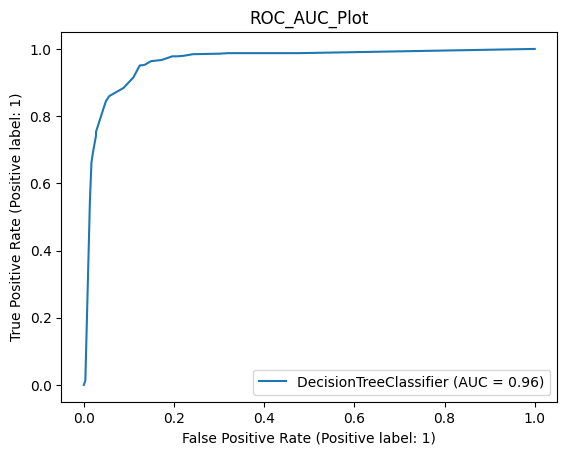

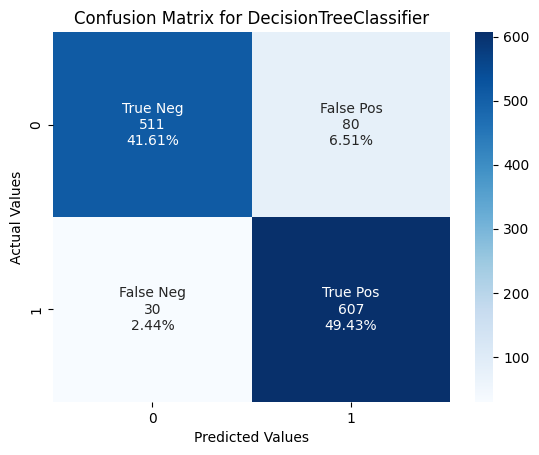

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       591
           1       0.88      0.95      0.92       637

    accuracy                           0.91      1228
   macro avg       0.91      0.91      0.91      1228
weighted avg       0.91      0.91      0.91      1228



Running GridSearchCV for XGBoost classifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score for XGBoost: 98.38%
Cross Validation Score :  98.52%
ROC_AUC Score :  94.59%


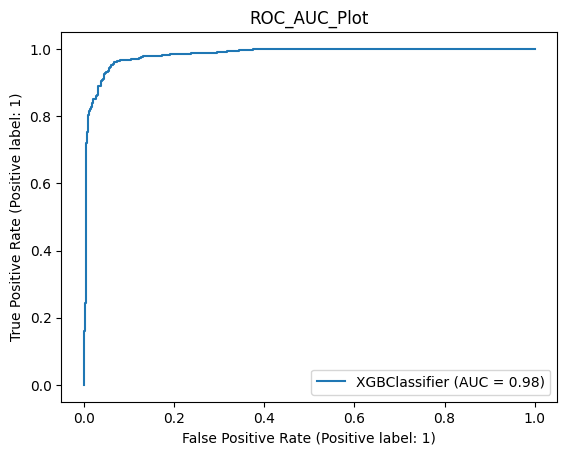

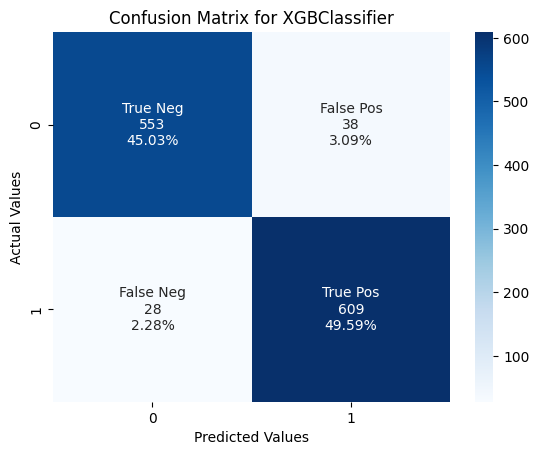

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       591
           1       0.94      0.96      0.95       637

    accuracy                           0.95      1228
   macro avg       0.95      0.95      0.95      1228
weighted avg       0.95      0.95      0.95      1228



Running GridSearchCV for Random Forest classifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 98.79%
Cross Validation Score :  98.89%
ROC_AUC Score :  95.06%


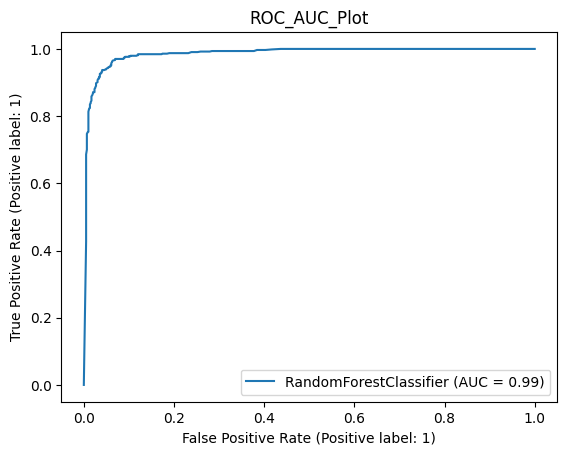

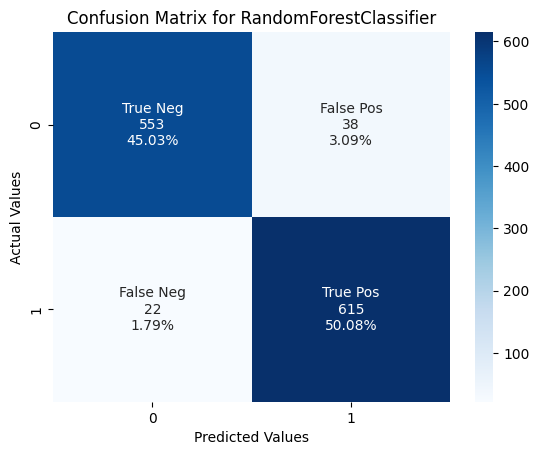

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       591
           1       0.94      0.97      0.95       637

    accuracy                           0.95      1228
   macro avg       0.95      0.95      0.95      1228
weighted avg       0.95      0.95      0.95      1228



Running GridSearchCV for Gradient Boosting classifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}
Best score for Gradient Boosting: 98.34%
Cross Validation Score :  98.46%
ROC_AUC Score :  94.09%


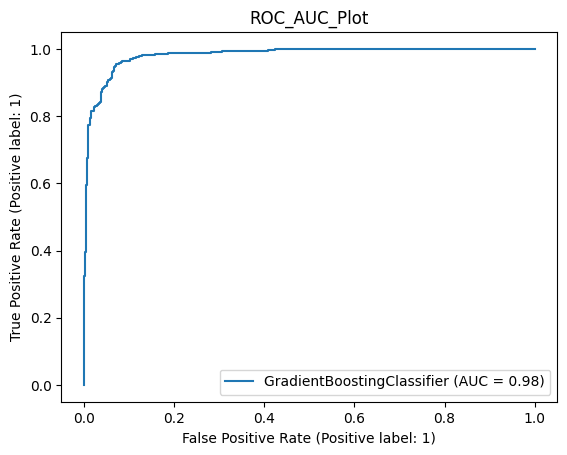

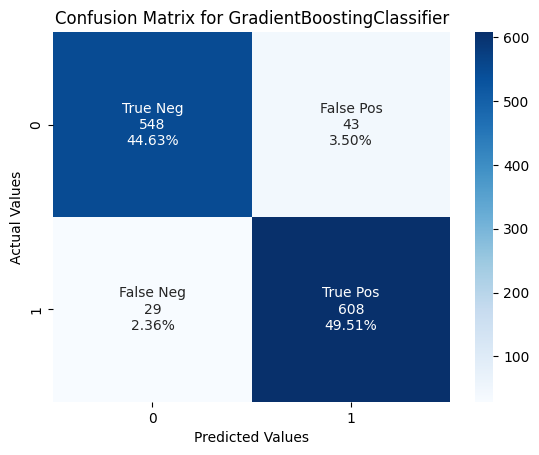

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       591
           1       0.93      0.95      0.94       637

    accuracy                           0.94      1228
   macro avg       0.94      0.94      0.94      1228
weighted avg       0.94      0.94      0.94      1228



Running GridSearchCV for Logistic Regression classifier...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best score for Logistic Regression: 96.69%
Cross Validation Score :  96.73%
ROC_AUC Score :  89.87%


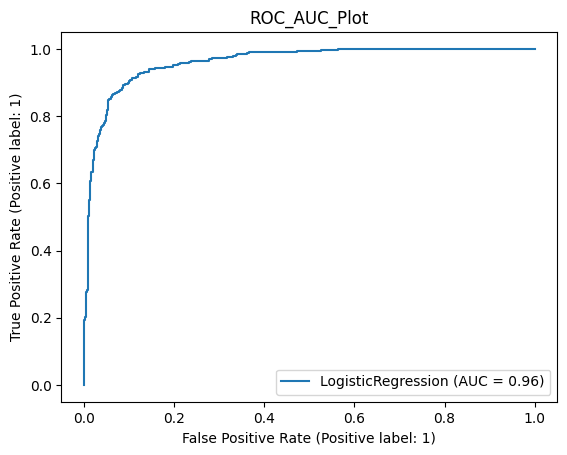

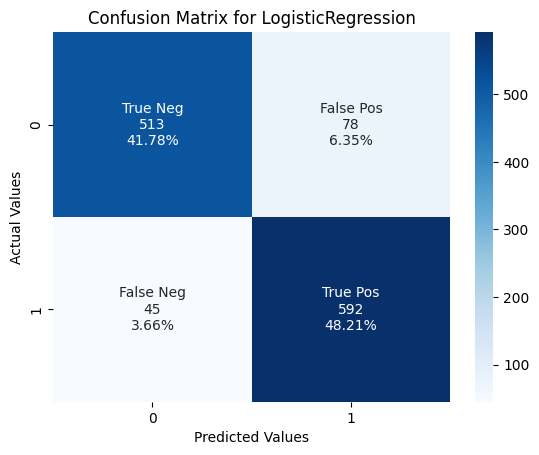

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       591
           1       0.88      0.93      0.91       637

    accuracy                           0.90      1228
   macro avg       0.90      0.90      0.90      1228
weighted avg       0.90      0.90      0.90      1228



Running GridSearchCV for AdaBoost classifier...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 50}
Best score for AdaBoost: 96.95%
Cross Validation Score :  96.88%
ROC_AUC Score :  90.18%


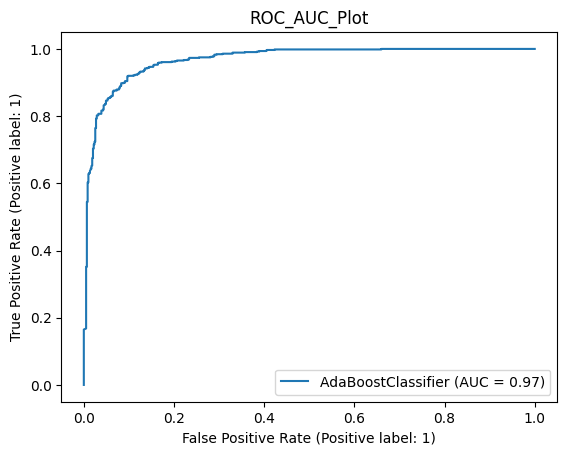

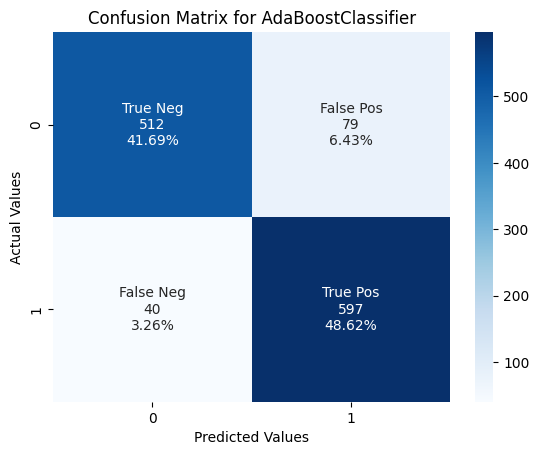

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       591
           1       0.88      0.94      0.91       637

    accuracy                           0.90      1228
   macro avg       0.91      0.90      0.90      1228
weighted avg       0.90      0.90      0.90      1228



Running GridSearchCV for Extra Trees classifier...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Extra Trees: {'max_depth': None, 'n_estimators': 200}
Best score for Extra Trees: 99.31%
Cross Validation Score :  99.41%
ROC_AUC Score :  96.80%


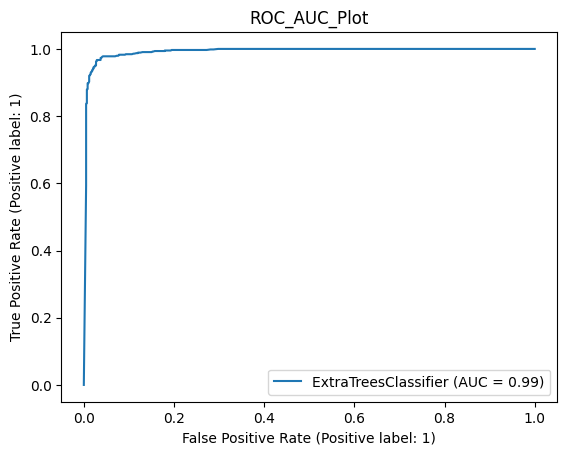

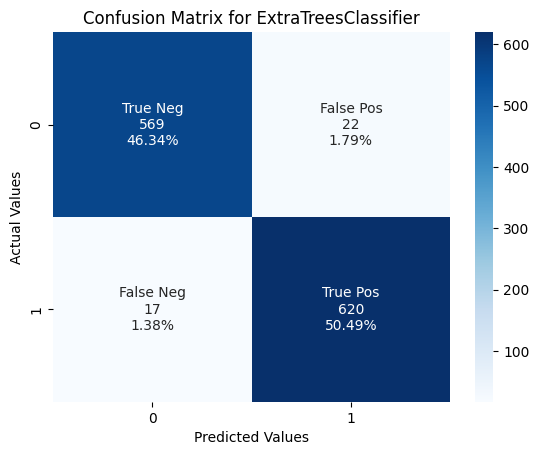

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       591
           1       0.97      0.97      0.97       637

    accuracy                           0.97      1228
   macro avg       0.97      0.97      0.97      1228
weighted avg       0.97      0.97      0.97      1228



Running GridSearchCV for SGD Classifier classifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters for SGD Classifier: {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
Best score for SGD Classifier: 96.54%
Cross Validation Score :  96.51%
ROC_AUC Score :  87.26%


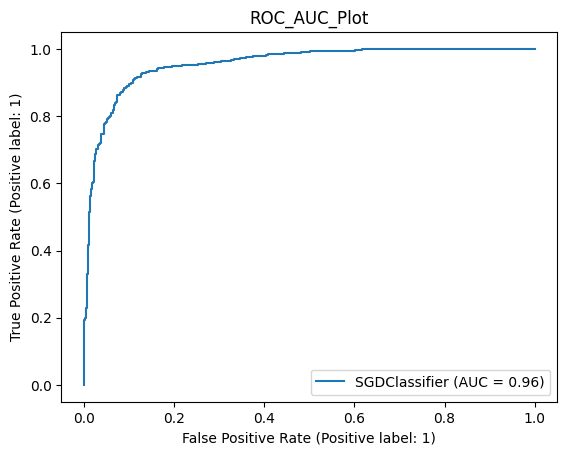

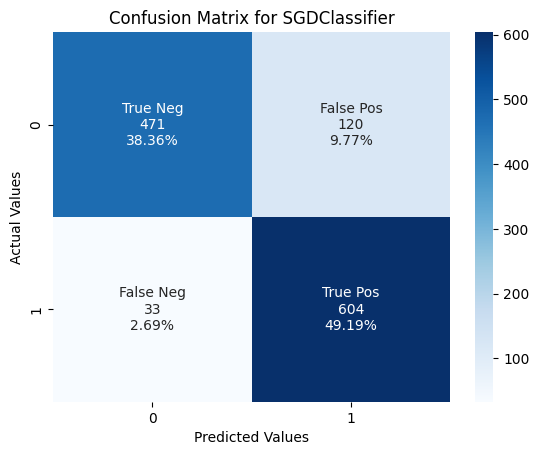

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       591
           1       0.83      0.95      0.89       637

    accuracy                           0.88      1228
   macro avg       0.88      0.87      0.87      1228
weighted avg       0.88      0.88      0.87      1228



Running GridSearchCV for Support Vector Classifier (SVC) classifier...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Support Vector Classifier (SVC): {'C': 1, 'kernel': 'linear'}
Best score for Support Vector Classifier (SVC): 96.63%
Cross Validation Score :  96.66%
ROC_AUC Score :  89.32%


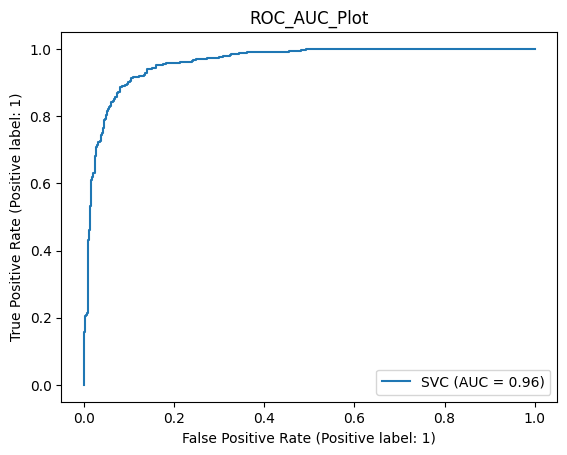

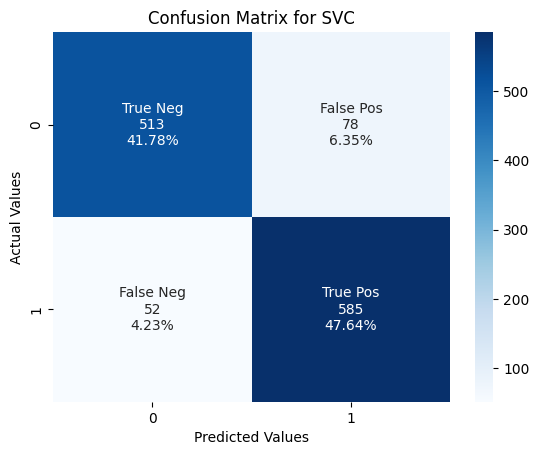

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       591
           1       0.88      0.92      0.90       637

    accuracy                           0.89      1228
   macro avg       0.90      0.89      0.89      1228
weighted avg       0.89      0.89      0.89      1228



Running GridSearchCV for K-Nearest Neighbors classifier...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for K-Nearest Neighbors: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best score for K-Nearest Neighbors: 98.74%
Cross Validation Score :  98.83%
ROC_AUC Score :  95.43%


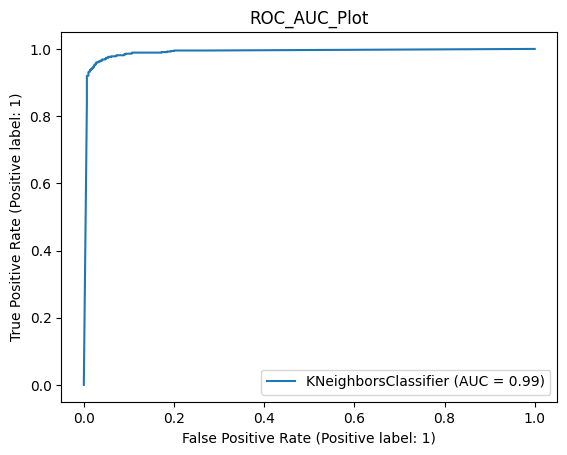

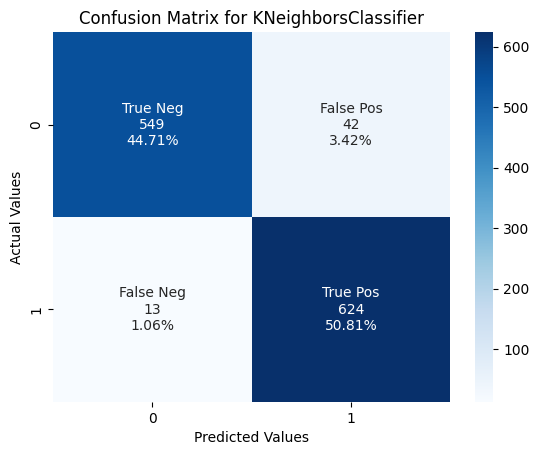

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       591
           1       0.94      0.98      0.96       637

    accuracy                           0.96      1228
   macro avg       0.96      0.95      0.96      1228
weighted avg       0.96      0.96      0.96      1228





In [ ]:
# Define classifiers and hyperparameters for GridSearchCV
classifiers = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=1000),
        'params': {
            'max_depth': [3, 4, 5, 6],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'n_estimators': [100, 500]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=1000),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=1000),
        'params': {
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 500],
            'max_depth': [3, 5]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(random_state=1000, max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(random_state=1000),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(random_state=1000),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20]
        }
    },
    'SGD Classifier': {
        'model': SGDClassifier(random_state=1000),
        'params': {
            'loss': ['hinge', 'log'],
            'penalty': ['l2', 'l1'],
            'alpha': [0.0001, 0.001]
        }
    },
    'Support Vector Classifier (SVC)': {
        'model': SVC(probability=True, random_state=1000),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
}

# Loop through classifiers and perform GridSearchCV
for name, clf_dict in classifiers.items():
    print(f"Running GridSearchCV for {name} classifier...")

    grid_search = GridSearchCV(estimator=clf_dict['model'], param_grid=clf_dict['params'],
                               cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
    grid_search.fit(Xr_train, yr_train)

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best score for {name}: {grid_search.best_score_:.2%}")

    # Use the best estimator for evaluation
    best_clf = grid_search.best_estimator_
    model(best_clf, Xr_train, yr_train, Xr_test, yr_test)
    model_evaluation(best_clf, Xr_test, yr_test)
    print("\n" + "="*60 + "\n")

## Clustering

In [49]:
## Import The important libraries :
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.graph_objs as go

In [50]:
text_data_features = [i for i in list(telecom.columns) if i not in list(telecom.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    telecom[i] = le.fit_transform(telecom[i])
    print(i,' : ',telecom[i].unique(),' = ',le.inverse_transform(telecom[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


# Features Extraction

***1) Monthly Charge With Tenure Feature***

creates a new feature in the dataset that multiplies the monthly charges (MonthlyCharges) by the number of months the customer has been with the company (tenure).

By multiplying these two columns, the new feature MonthlyChargeWithTenure provides an estimate of the total amount the customer has been charged over the period of their tenure. This value may help to identify long-term customers who have been paying higher amounts, which could influence their likelihood of churning or staying with the company.

In [51]:
telecom['MonthlyChargeWithTenure']=telecom['MonthlyCharges']*telecom['tenure']

***2) Contract Length Feature***

Convert the Contract type into a numerical value to represent the length of the contract. Longer contracts might correlate with lower churn.

In [52]:
def ContractLength(df):
  if df['Contract']==0:
    return 1
  elif df['Contract']==1:
    return 12
  else:
    return 24

telecom['ContractLength']=telecom.apply(ContractLength,axis=1)

***3) Contract Tenure Risk Feature***

Create a new feature that reflects whether a customer is more likely to churn based on their contract type and tenure.

Month-to-month with low tenure could indicate high churn risk, while a two-year contract with long tenure might indicate low risk.

In [53]:
def calculate_contract_tenure_risk(df):
    contract = df['Contract']
    tenure = df['tenure']

    if contract == 0:
        if tenure <= 6:
            return 'High'
        elif 7 <= tenure <= 12:
            return 'Medium'
        else:
            return 'Low'
    elif contract == 1:
        if tenure <= 6:
            return 'Medium'
        elif 7 <= tenure <= 12:
            return 'Low'
        else:
            return 'Very Low'
    elif contract == 2:
        if tenure <= 12:
            return 'Low'
        else:
            return 'Very Low'

telecom['ContractTenureRisk'] = telecom.apply(calculate_contract_tenure_risk, axis=1)

In [54]:
telecom['ContractTenureRisk']=telecom['ContractTenureRisk'].replace({'Very Low':0,'Low':1,'Medium':2,'High':3})

In [55]:
X_Cluster=telecom[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'MonthlyChargeWithTenure', 'ContractLength', 'ContractTenureRisk','Churn']]

In [56]:
X_Cluster.head()

SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0              0        1           0       1                0   
1              0        0           0      34                0   
2              0        0           0       2                0   
3              0        0           0      45                0   
4              0        0           0       2                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   
3               2             0                 2            2         1   
4               0             0                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  MonthlyChargeWithTenure  \
0                 1              2           29.85                    29.85   
1                 0              3           56.95                  1936.30   
2                 1              3           53.85                   107.70   
3                 0              0           42.30                  1903.50   
4                 1              2           70.70                   141.40   

   ContractLength  ContractTenureRisk  Churn  
0               1                   3      0  
1              12                   0      0  
2               1                   3      1  
3              12                   0      0  
4               1                   3      1

In [57]:
## Elbow method :
InertiaDict={}
for i in range(2,16):
    KMeansModel = KMeans(n_clusters=i, init='k-means++', algorithm= 'lloyd', random_state=33) # ,
    KMeansModel.fit(X_Cluster)
    InertiaDict[i]=KMeansModel.inertia_

In [58]:
InertiaDict

{2: 7919041976.455362,
 3: 3684121787.7470846,
 4: 2124642582.3026156,
 5: 1331943912.2608457,
 6: 903163077.5486555,
 7: 664606604.8409295,
 8: 519298821.8512279,
 9: 411684987.7580913,
 10: 327861201.45570797,
 11: 268974787.7372715,
 12: 229365349.81831303,
 13: 194898539.04737055,
 14: 166909102.9292191,
 15: 147775004.94303843}

In [59]:
# Create figure for Plotly
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=list(InertiaDict.keys()),
    y=list(InertiaDict.values()),
    mode='lines+markers',
    marker=dict(size=8, color='blue'),
    line=dict(dash='solid'),
    name='SSD'
))

# Add vertical line for optimal clusters
optimal_clusters = 6  # Replace with the optimal number of clusters you have determined
fig.add_vline(x=optimal_clusters, line_width=2, line_dash='dash', line_color='red', annotation_text='Optimal Clusters', annotation_position='top right')

# Add animation frames for the progressive reveal of clusters
frames = [go.Frame(data=[go.Scatter(x=list(InertiaDict.keys())[:k],
                                    y=list(InertiaDict.values())[:k],
                                    mode='lines+markers',
                                    marker=dict(size=8, color='blue'),
                                    line=dict(dash='solid'))],
                   name=str(k)) for k in range(1, len(InertiaDict) + 1)]

# Add frames to the figure
fig.frames = frames

# Update layout
fig.update_layout(
    title="Elbow Method",
    xaxis_title="Number of Clusters",
    yaxis_title="SSD",
    legend=dict(x=0.8, y=0.2),
    showlegend=True,
    updatemenus=[dict(type="buttons", showactive=False,
                      buttons=[dict(label="Play", method="animate",
                                    args=[None, dict(frame=dict(duration=400, redraw=True), fromcurrent=True)])])],
    width=1000,  # Set the width of the plot
    height=500   # Set the height of the plot
)

# Show the plot
fig.show()

In [60]:
KMeansModel = KMeans(n_clusters=6, init='k-means++', algorithm= 'lloyd', random_state=33) # , algorithm= 'full'
KMeansModel.fit(X_Cluster)

KMeans(n_clusters=6, random_state=33)

In [61]:
clusters=pd.DataFrame(KMeansModel.cluster_centers_,columns=X_Cluster.columns,index=['ClusterA','ClusterB','ClusterC','ClusterD',
                                                                                 'ClusterE','ClusterF'])

In [62]:
clusters

SeniorCitizen   Partner  Dependents     tenure  InternetService  \
ClusterA       0.140537  0.510306    0.352904  34.531543         1.038726   
ClusterB       0.212121  0.725830    0.333333  62.598846         0.658009   
ClusterC       0.120756  0.295525    0.246914   8.238812         1.042438   
ClusterD       0.204574  0.613723    0.335451  52.787802         0.536213   
ClusterE       0.230088  0.776549    0.345133  69.119469         0.975664   
ClusterF       0.209150  0.525054    0.276688  38.325708         0.505447   

          OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
ClusterA        0.779513      0.785759          0.790756     0.753279   
ClusterB        1.131313      1.460317          1.417027     1.111111   
ClusterC        0.576389      0.622685          0.598765     0.582562   
ClusterD        0.988564      1.168996          1.196950     1.011436   
ClusterE        1.234513      1.650442          1.676991     1.371681   
ClusterF        0.764706      0.908497          0.947712     0.775599   

          Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
ClusterA  0.799500          0.529669       1.497814       53.193723   
ClusterB  1.238095          0.670996       1.124098       93.326912   
ClusterC  0.285108          0.523920       2.033179       47.688137   
ClusterD  0.965693          0.687421       1.198221       82.662135   
ClusterE  1.568584          0.774336       0.946903      107.419027   
ClusterF  0.563181          0.663399       1.383442       75.230664   

          MonthlyChargeWithTenure  ContractLength  ContractTenureRisk  \
ClusterA              1339.539507       10.098688            0.589631   
ClusterB              5781.513420       15.075036            0.217893   
ClusterC               291.791705        4.219522            2.149306   
ClusterD              4216.060546       11.949174            0.360864   
ClusterE              7422.515819       18.909292            0.086283   
ClusterF              2695.598039        7.328976            0.570806   

             Churn  
ClusterA  0.216740  
ClusterB  0.151515  
ClusterC  0.381944  
ClusterD  0.168996  
ClusterE  0.112832  
ClusterF  0.264706

This is the center of each cluster

In [63]:
values=pd.Series(KMeansModel.labels_).value_counts().sort_index()

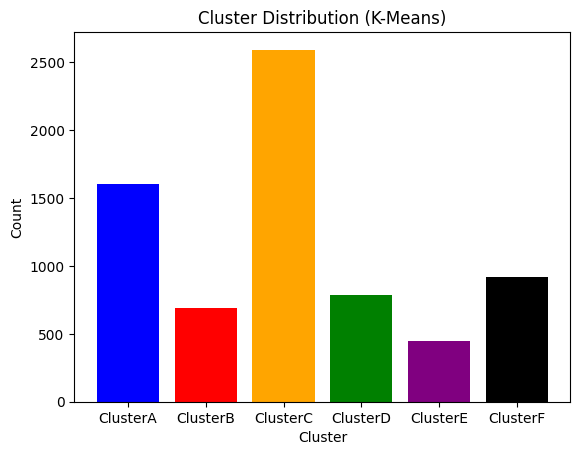

In [64]:
plt.bar(clusters.index,values,color=['blue','red','orange','green','purple','black'])
plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

The Majority of dataset using (K-Means) belongs to Cluster C

In [65]:
X_Cluster['Cluster'] = KMeansModel.labels_

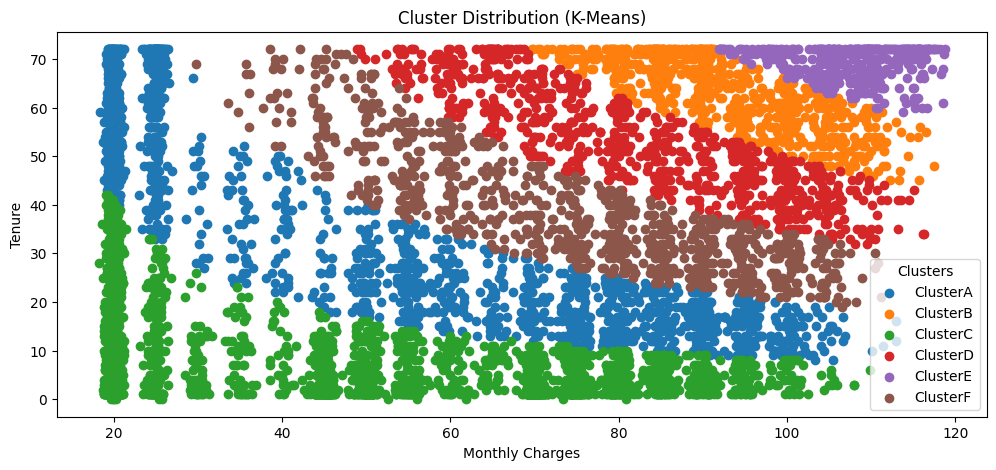

In [66]:
plt.figure(figsize=(12,5))
for i,label in zip(set(KMeansModel.labels_),clusters.index):
  plt.scatter(x=X_Cluster[X_Cluster['Cluster']==i]['MonthlyCharges'],y=X_Cluster[X_Cluster['Cluster']==i]['tenure'],
              label=label)

plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.legend(title='Clusters')
plt.show()

In [67]:
# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']

# Create traces for each cluster with hover information
traces = []
for i,label in zip(set(KMeansModel.labels_),clusters.index):
    cluster_data = X_Cluster[X_Cluster['Cluster'] == i]
    trace = go.Scatter(
        x=cluster_data['MonthlyCharges'],
        y=cluster_data['tenure'],
        mode='markers',
        marker=dict(size=10, color=colors[i]),
        name=label,
        hovertext=[f"Churn: {churn}<br>Tenure: {tenure} months<br>MonthlyCharges: ${MonthlyCharges}"
                   for churn, tenure, MonthlyCharges in zip( cluster_data['Churn'],
                                                             cluster_data['tenure'],
                                                             cluster_data['MonthlyCharges'])], # Hover text with only churn info
        hoverinfo='text'  # Display only the hover text
    )
    traces.append(trace)

# Set up layout
layout = go.Layout(
    xaxis=dict(title='MonthlyCharges'),
    yaxis=dict(title='tenure'),
    title='Cluster Distribution (K-Means) using PLotly',
    showlegend=True
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()

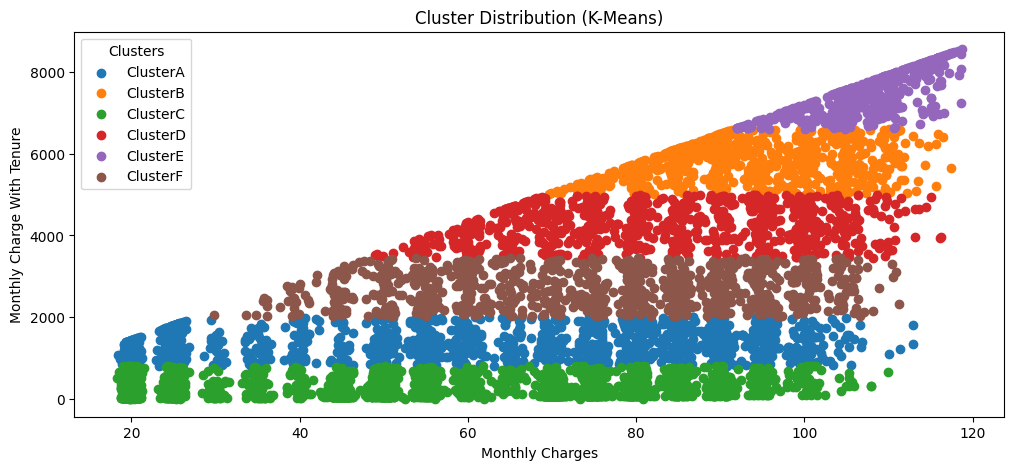

In [68]:
plt.figure(figsize=(12,5))
for i,label in zip(set(KMeansModel.labels_),clusters.index):
  plt.scatter(x=X_Cluster[X_Cluster['Cluster']==i]['MonthlyCharges'],y=X_Cluster[X_Cluster['Cluster']==i]['MonthlyChargeWithTenure'],
              label=label)

plt.title('Cluster Distribution (K-Means)')
plt.ylabel('Monthly Charge With Tenure')
plt.xlabel('Monthly Charges')
plt.legend(title='Clusters')
plt.show()

In [69]:
# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']

# Create traces for each cluster with hover information
traces = []
for i,label in zip(set(KMeansModel.labels_),clusters.index):
    cluster_data = X_Cluster[X_Cluster['Cluster'] == i]
    trace = go.Scatter(
        x=cluster_data['MonthlyCharges'],
        y=cluster_data['MonthlyChargeWithTenure'],
        mode='markers',
        marker=dict(size=10, color=colors[i]),
        name=label,
        hovertext=[f"Churn: {churn}<br>MonthlyCharges: {MonthlyCharges} <br>MonthlyChargeWithTenure: {MonthlyChargeWithTenure}"
                   for churn, MonthlyCharges, MonthlyChargeWithTenure in zip( cluster_data['Churn'],
                                                             cluster_data['MonthlyCharges'],
                                                             cluster_data['MonthlyChargeWithTenure'])], # Hover text with only churn info
        hoverinfo='text'  # Display only the hover text
    )
    traces.append(trace)

# Set up layout
layout = go.Layout(
    xaxis=dict(title='MonthlyCharges'),
    yaxis=dict(title='MonthlyChargeWithTenure'),
    title='Cluster Distribution (K-Means) using PLotly',
    showlegend=True
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [70]:
X_Cluster.drop('Cluster',axis=1,inplace=True)

In [71]:
X_Cluster.head()

SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0              0        1           0       1                0   
1              0        0           0      34                0   
2              0        0           0       2                0   
3              0        0           0      45                0   
4              0        0           0       2                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   
3               2             0                 2            2         1   
4               0             0                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  MonthlyChargeWithTenure  \
0                 1              2           29.85                    29.85   
1                 0              3           56.95                  1936.30   
2                 1              3           53.85                   107.70   
3                 0              0           42.30                  1903.50   
4                 1              2           70.70                   141.40   

   ContractLength  ContractTenureRisk  Churn  
0               1                   3      0  
1              12                   0      0  
2               1                   3      1  
3              12                   0      0  
4               1                   3      1

## Hierarchical Clusters

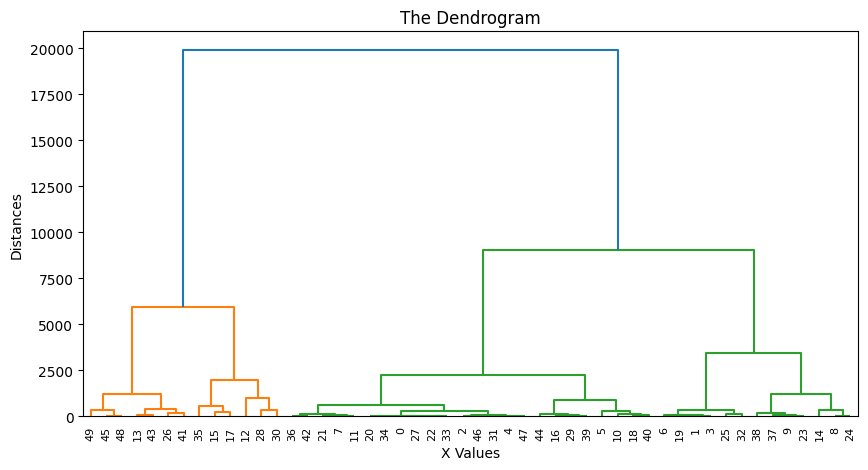

In [72]:
AggClusteringModel = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')

X_Cluster['HierarchicalCluster']= AggClusteringModel.fit_predict(X_Cluster)
fig, ax = plt.subplots(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X_Cluster.iloc[:50,:], method = 'ward'))
plt.title('The Dendrogram')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.xticks(rotation=90)
plt.show()

This graph shows Dendrogram for first 50 rows of data

In [73]:
values=X_Cluster['HierarchicalCluster'].value_counts().sort_index()

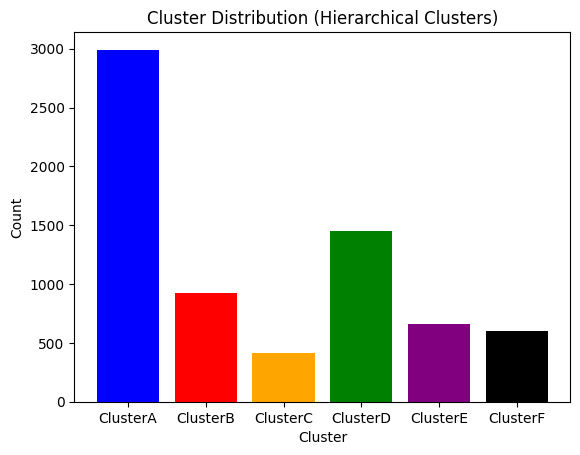

In [74]:
plt.bar(clusters.index,values,color=['blue','red','orange','green','purple','black'])
plt.title('Cluster Distribution (Hierarchical Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

The Majority of dataset using (Hierarchical Clusters) belongs to ClusterA

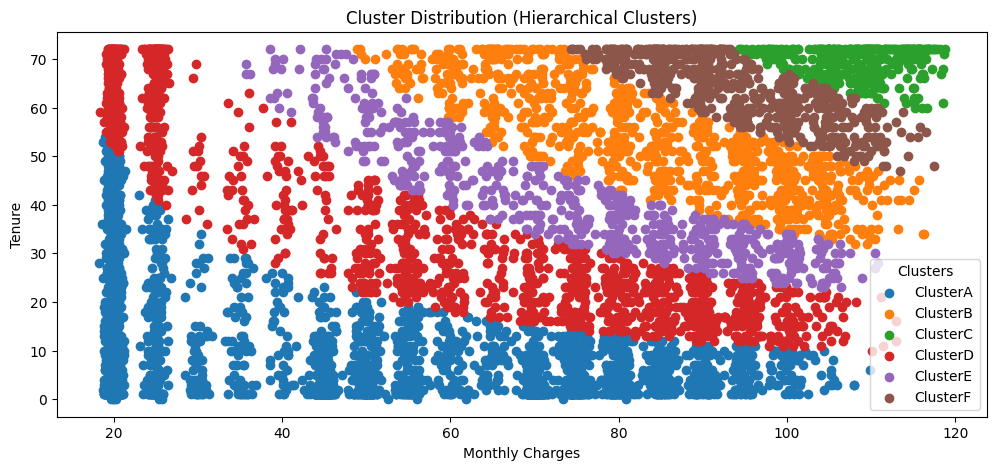

In [75]:
plt.figure(figsize=(12,5))
for i,label in zip(set(AggClusteringModel.labels_),clusters.index):
  plt.scatter(x=X_Cluster[X_Cluster['HierarchicalCluster']==i]['MonthlyCharges'],y=X_Cluster[X_Cluster['HierarchicalCluster']==i]['tenure'],
              label=label)

plt.title('Cluster Distribution (Hierarchical Clusters)')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')
plt.legend(title='Clusters')
plt.show()

In [76]:
# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']

# Create traces for each cluster with hover information
traces = []
for i,label in zip(set(AggClusteringModel.labels_),clusters.index):
    cluster_data = X_Cluster[X_Cluster['HierarchicalCluster'] == i]
    trace = go.Scatter(
        x=cluster_data['MonthlyCharges'],
        y=cluster_data['tenure'],
        mode='markers',
        marker=dict(size=10, color=colors[i]),
        name=label,
        hovertext=[f"Churn: {churn}<br>Tenure: {tenure} months<br>MonthlyCharges: ${MonthlyCharges}"
                   for churn, tenure, MonthlyCharges in zip( cluster_data['Churn'],
                                                             cluster_data['tenure'],
                                                             cluster_data['MonthlyCharges'])], # Hover text with only churn info
        hoverinfo='text'  # Display only the hover text
    )
    traces.append(trace)

# Set up layout
layout = go.Layout(
    xaxis=dict(title='MonthlyCharges'),
    yaxis=dict(title='tenure'),
    title='Cluster Distribution (Hierarchical Clusters) using PLotly',
    showlegend=True
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()


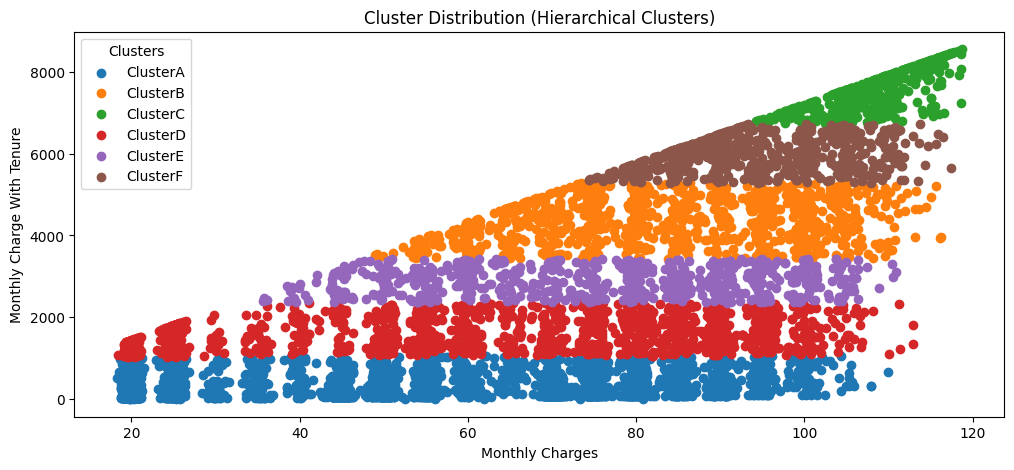

In [77]:
plt.figure(figsize=(12,5))
for i,label in zip(set(AggClusteringModel.labels_),clusters.index):
  plt.scatter(x=X_Cluster[X_Cluster['HierarchicalCluster']==i]['MonthlyCharges'],y=X_Cluster[X_Cluster['HierarchicalCluster']==i]['MonthlyChargeWithTenure'],
              label=label)

plt.title('Cluster Distribution (Hierarchical Clusters)')
plt.ylabel('Monthly Charge With Tenure')
plt.xlabel('Monthly Charges')
plt.legend(title='Clusters')
plt.show()

In [78]:
# Define colors for the clusters
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']

# Create traces for each cluster with hover information
traces = []
for i,label in zip(set(KMeansModel.labels_),clusters.index):
    cluster_data = X_Cluster[X_Cluster['HierarchicalCluster'] == i]
    trace = go.Scatter(
        x=cluster_data['MonthlyCharges'],
        y=cluster_data['MonthlyChargeWithTenure'],
        mode='markers',
        marker=dict(size=10, color=colors[i]),
        name=label,
        hovertext=[f"Churn: {churn}<br>MonthlyCharges: {MonthlyCharges} <br>MonthlyChargeWithTenure: {MonthlyChargeWithTenure}"
                   for churn, MonthlyCharges, MonthlyChargeWithTenure in zip( cluster_data['Churn'],
                                                             cluster_data['MonthlyCharges'],
                                                             cluster_data['MonthlyChargeWithTenure'])], # Hover text with only churn info
        hoverinfo='text'  # Display only the hover text
    )
    traces.append(trace)

# Set up layout
layout = go.Layout(
    xaxis=dict(title='MonthlyCharges'),
    yaxis=dict(title='MonthlyChargeWithTenure'),
    title='Cluster Distribution (Hierarchical Clusters) using PLotly',
    showlegend=True
)

# Create figure and plot
fig = go.Figure(data=traces, layout=layout)
fig.show()

In [79]:
X_Cluster.drop('HierarchicalCluster',axis=1,inplace=True)

In [80]:
X_Cluster.head()

SeniorCitizen  Partner  Dependents  tenure  InternetService  \
0              0        1           0       1                0   
1              0        0           0      34                0   
2              0        0           0       2                0   
3              0        0           0      45                0   
4              0        0           0       2                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0               0             2                 0            0         0   
1               2             0                 2            0         1   
2               2             2                 0            0         0   
3               2             0                 2            2         1   
4               0             0                 0            0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  MonthlyChargeWithTenure  \
0                 1              2           29.85                    29.85   
1                 0              3           56.95                  1936.30   
2                 1              3           53.85                   107.70   
3                 0              0           42.30                  1903.50   
4                 1              2           70.70                   141.40   

   ContractLength  ContractTenureRisk  Churn  
0               1                   3      0  
1              12                   0      0  
2               1                   3      1  
3              12                   0      0  
4               1                   3      1

In [81]:
X_Cluster.shape

(7043, 17)

***Comparsion Cluster using Silhouette Score***

Measures how well each point fits within its cluster compared to other clusters. Higher values indicate better clustering
 (ranges between -1 and +1).

In [82]:
# Silhouette Score :
from sklearn.metrics import silhouette_score
silhouette_kmeans = silhouette_score(X_Cluster,KMeansModel.labels_)
silhouette_hier = silhouette_score(X_Cluster, AggClusteringModel.labels_)
print(f'Silhouette Score (K-Means): {silhouette_kmeans}')
print(f'Silhouette Score (Hierarchical): {silhouette_hier}')

Silhouette Score (K-Means): 0.5952399212505846
Silhouette Score (Hierarchical): 0.5800121517407858


Through Comparison, using Silhouette Score K-Means is better than Hierarchical

Using PCA

In [83]:
## PCA :
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_Cluster)

# Run PCA
pca = PCA().fit(X_scaled)

# Cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the optimal number of components where variance >= 85%
optimal_components = np.searchsorted(explained_variance, 0.85) + 1

In [84]:
# Create figure for plotly
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=np.arange(1, len(explained_variance) + 1),
    y=explained_variance,
    mode='lines+markers',
    marker=dict(size=8, color='blue'),
    line=dict(dash='dash'),
    name='Explained Variance'
))

# Add vertical line for optimal components
fig.add_vline(x=optimal_components, line_width=2, line_dash='dash', line_color='red')

# Add animation frames for the progressive reveal of components
frames = [go.Frame(data=[go.Scatter(x=np.arange(1, k+1), y=explained_variance[:k], mode='lines+markers',
                                    marker=dict(size=8, color='blue'), line=dict(dash='dash'))],
                   name=str(k)) for k in range(1, len(explained_variance) + 1)]

# Add frames to the figure
fig.frames = frames

# Update layout
fig.update_layout(
    title="Cumulative Explained Variance vs Number of Components",
    xaxis_title="Number of Components",
    yaxis_title="Cumulative Explained Variance",
    legend=dict(x=0.8, y=0.2),
    showlegend=True,
    updatemenus=[dict(type="buttons", showactive=False,
                      buttons=[dict(label="Play", method="animate",
                                    args=[None, dict(frame=dict(duration=400, redraw=True), fromcurrent=True)])])],
    width=1000,  # Set the width of the plot
    height=500   # Set the height of the plot
)

# Show the plot
fig.show()

In [85]:
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_scaled)

In [86]:
KMeansModel = KMeans(n_clusters=6, init='k-means++', random_state=33, algorithm= 'lloyd') # full
KMeansModel.fit(X_pca)

KMeans(n_clusters=6, random_state=33)

In [87]:
clusters=pd.DataFrame(KMeansModel.cluster_centers_,index=['ClusterA','ClusterB','ClusterC','ClusterD',
                                                                                 'ClusterE','ClusterF'])

In [88]:
clusters

0         1         2         3         4         5  \
ClusterA -1.226186 -0.221390  0.112145 -0.972403  0.310660  0.335175   
ClusterB -2.727264  0.718033  0.172790  0.126387  0.130491 -0.457017   
ClusterC  1.593553 -2.329752 -0.137246  1.188893  0.317011 -0.235599   
ClusterD  0.094096  1.717148  0.093508  0.710128 -0.266662  0.406056   
ClusterE  2.940653  0.589685 -0.062631 -0.581611 -0.032648 -0.111902   
ClusterF -1.573772 -2.066037 -0.427621  0.472648 -0.940404  0.157531   

                 6         7         8         9  
ClusterA -0.042325 -0.047293 -0.122790 -0.559292  
ClusterB  0.150063 -0.109054  0.436814  0.499178  
ClusterC -0.181269 -0.268333 -0.003475  0.155765  
ClusterD -0.050928  0.250211 -0.148321 -0.290569  
ClusterE  0.159142 -0.034947  0.140722  0.089883  
ClusterF -0.283595  0.411778 -0.773232  0.251678

In [89]:
values=pd.Series(KMeansModel.labels_).value_counts().sort_index()

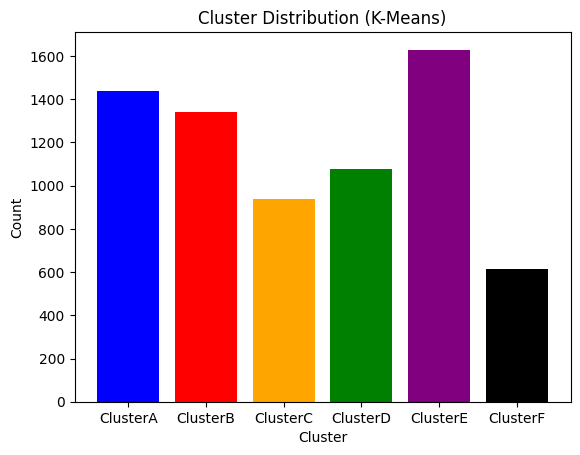

In [90]:
plt.bar(clusters.index,values,color=['blue','red','orange','green','purple','black'])
plt.title('Cluster Distribution (K-Means)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [91]:
# Plotly Scatter Plot
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=KMeansModel.labels_,
                 labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'},
                 title='Cluster Distribution (K-Means)')

# Show the plot
fig.show()

In [92]:
# Create 3D Scatter Plot
fig = go.Figure(data=[go.Scatter3d(x=X_pca[:, 0], y=X_pca[:, 1], z=X_pca[:, 2],
                                   mode='markers',
                                   marker=dict(size=5, color=KMeansModel.labels_, colorscale='Viridis', opacity=0.8))])

# Update plot layout
fig.update_layout(scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'),
                  title='Cluster Distribution (K-Means)',
                  width=800, height=600)

# Show the plot
fig.show()

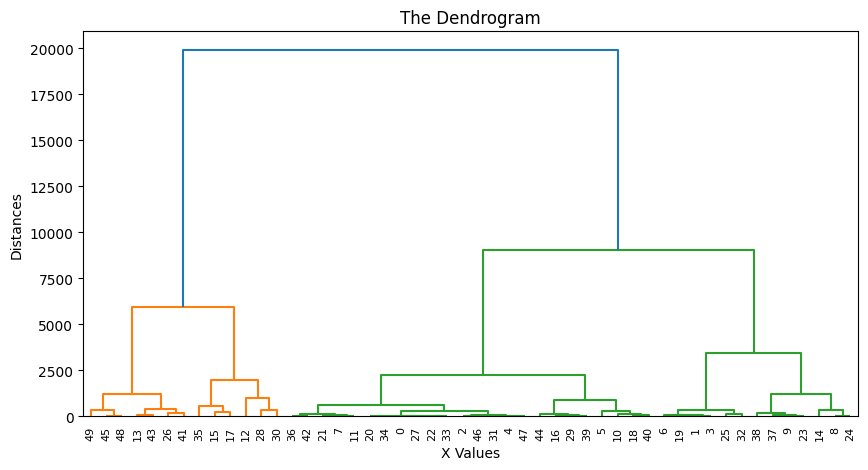

In [93]:
AggClusteringModel = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward') # affinity='euclidean'

y_pred= AggClusteringModel.fit_predict(X_pca)
fig, ax = plt.subplots(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X_Cluster.iloc[:50,:], method = 'ward'))
plt.title('The Dendrogram')
plt.xlabel('X Values')
plt.ylabel('Distances')
plt.xticks(rotation=90)
plt.show()

In [94]:
values=pd.Series(y_pred).value_counts().sort_index()

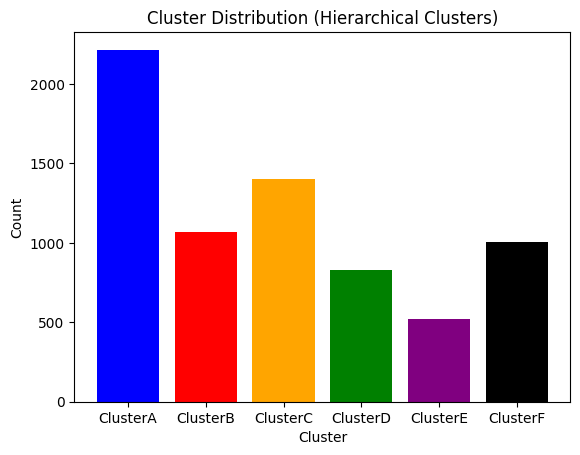

In [95]:
plt.bar(clusters.index,values,color=['blue','red','orange','green','purple','black'])
plt.title('Cluster Distribution (Hierarchical Clusters)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [96]:
# Plotly Scatter Plot
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=AggClusteringModel.labels_,
                 labels={'x': 'Principal Component 1', 'y': 'Principal Component 2'},
                 title='Cluster Distribution (Hierarchical Clusters)')

# Show the plot
fig.show()

In [97]:
# Plot using Plotly
fig = go.Figure()

# Create the 3D scatter plot
fig.add_trace(go.Scatter3d(
    x=X_pca[:, 0],  # Principal Component 1
    y=X_pca[:, 1],  # Principal Component 2
    z=X_pca[:, 2],  # Principal Component 3
    mode='markers',
    marker=dict(
        size=5,
        color=y_pred,  # Use predicted cluster labels as color
        colorscale='Viridis',  # Color scale
        opacity=0.8
    )
))

# Update layout for 3D scatter plot
fig.update_layout(
    title="Cluster Distribution (Hierarchical Clusters)",
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3'
    ),
    width=800,
    height=600
)

# Show the figure
fig.show()